In [1]:
!pip install mlflow

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26.7/26.7 MB 27.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.2/2.2 MB 24.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.2/1.2 MB 10.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 147.8/147.8 kB 3.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 329.1/329.1 kB 14.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 114.9/114.9 kB 5.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import mlflow
import mlflow.sklearn
import warnings
warnings.filterwarnings('ignore')

# Initialize MLflow
mlflow.set_experiment("Loan")

2025/10/13 05:30:55 INFO mlflow.tracking.fluent: Experiment with name 'Loan' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/731102180034322351', creation_time=1760333455284, experiment_id='731102180034322351', last_update_time=1760333455284, lifecycle_stage='active', name='Loan', tags={}>

In [3]:
# Step 1: Data Loading and Exploration
print("Loading and exploring data...")
# Load the dataset and strip whitespace from column names
df = pd.read_csv('/content/loan_approval_dataset.csv')

# **FIX: Strip whitespace from column names**
df.columns = df.columns.str.strip()

# **FIX: Strip whitespace from string columns**
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDataset Description:")
print(df.describe())

Loading and exploring data...
Dataset Shape: (4269, 13)

Column Names: ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  42

In [5]:

# Check target variable distribution

print("Target Variable Distribution:")
if 'loan_status' in df.columns:
    print(df['loan_status'].value_counts())
    print("\nTarget Variable Percentage:")
    print(df['loan_status'].value_counts(normalize=True) * 100)
else:
    print("ERROR: 'loan_status' column not found!")
    print("Available columns:", df.columns.tolist())


Target Variable Distribution:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Target Variable Percentage:
loan_status
Approved    62.215976
Rejected    37.784024
Name: proportion, dtype: float64


In [6]:
# Step 2: Data Preprocessing
def preprocess_data(df):
    """Preprocess the loan dataset for classification"""
    df_clean = df.copy()

    # Handle missing values
    print("\nHandling missing values...")
    for col in df_clean.columns:
        if df_clean[col].isnull().sum() > 0:
            if df_clean[col].dtype in ['int64', 'float64']:
                df_clean[col].fillna(df_clean[col].median(), inplace=True)
            else:
                df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

    # Convert categorical variables to numerical
    print("Encoding categorical variables...")

    # Education encoding
    if 'education' in df_clean.columns:
        education_map = {'Graduate': 1, 'Not Graduate': 0}
        df_clean['education'] = df_clean['education'].map(education_map)
        df_clean['education'].fillna(0, inplace=True)

    # Self-employed encoding
    if 'self_employed' in df_clean.columns:
        self_employed_map = {'Yes': 1, 'No': 0}
        df_clean['self_employed'] = df_clean['self_employed'].map(self_employed_map)
        df_clean['self_employed'].fillna(0, inplace=True)

    # Loan status encoding (target variable)
    if 'loan_status' in df_clean.columns:
        loan_status_map = {'Approved': 1, 'Rejected': 0}
        df_clean['loan_status'] = df_clean['loan_status'].map(loan_status_map)
        df_clean['loan_status'].fillna(0, inplace=True)

    # Convert all columns to numeric where possible
    for col in df_clean.columns:
        if df_clean[col].dtype == 'object':
            try:
                df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
                if df_clean[col].isnull().sum() > 0:
                    df_clean[col].fillna(df_clean[col].median(), inplace=True)
            except Exception as e:
                print(f"Could not convert column {col} to numeric: {e}")

    return df_clean


In [7]:

# Preprocess the data
df_processed = preprocess_data(df)
print("\nProcessed Dataset Shape:", df_processed.shape)
print("Processed Data Types:")
print(df_processed.dtypes)
print("\nProcessed Data Columns:")
print(df_processed.columns.tolist())
print("\nFirst 5 rows after preprocessing:")
print(df_processed.head())



Handling missing values...
Encoding categorical variables...

Processed Dataset Shape: (4269, 13)
Processed Data Types:
loan_id                     int64
no_of_dependents            int64
education                   int64
self_employed               int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int64
dtype: object

Processed Data Columns:
['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']

First 5 rows after preprocessing:
   loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1                 2          1              0   


PERFORMING EXPLORATORY DATA ANALYSIS


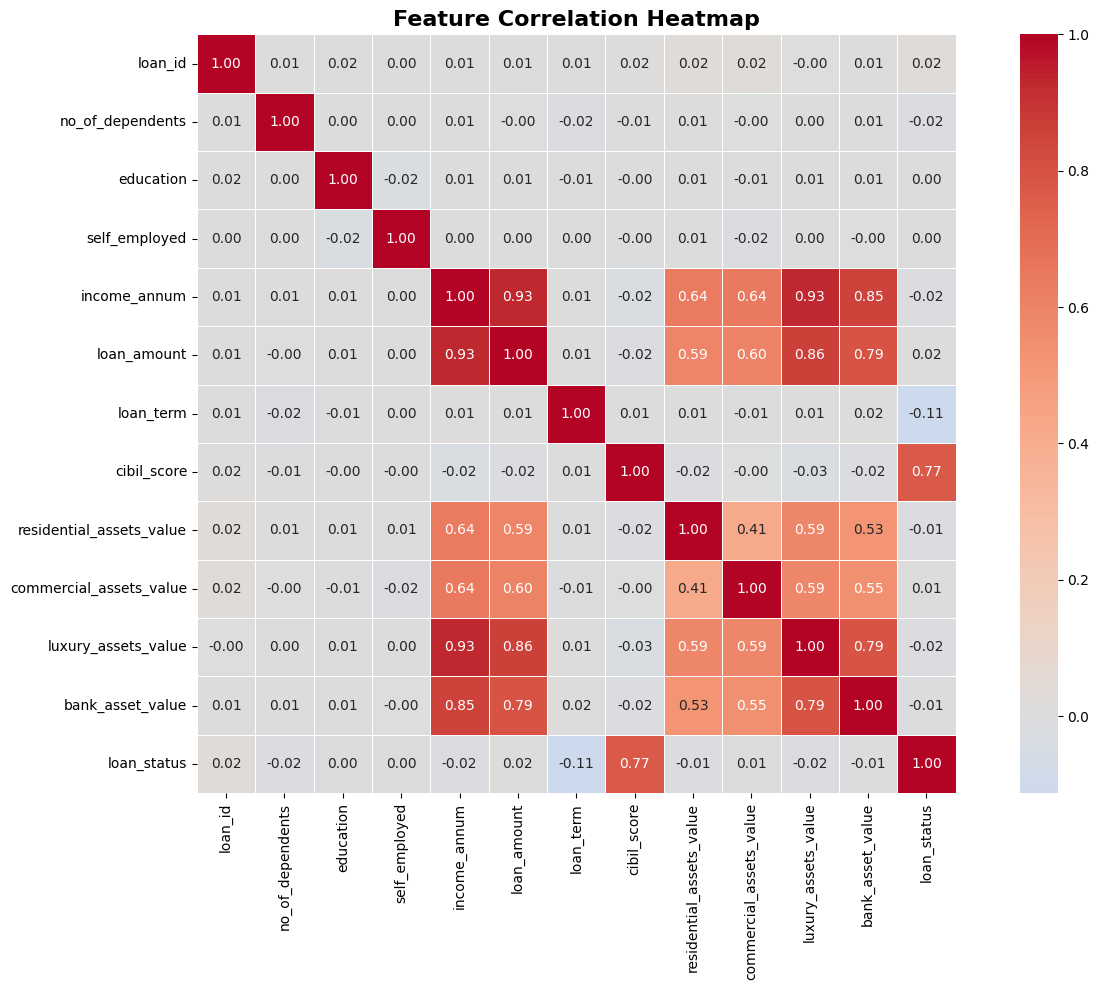

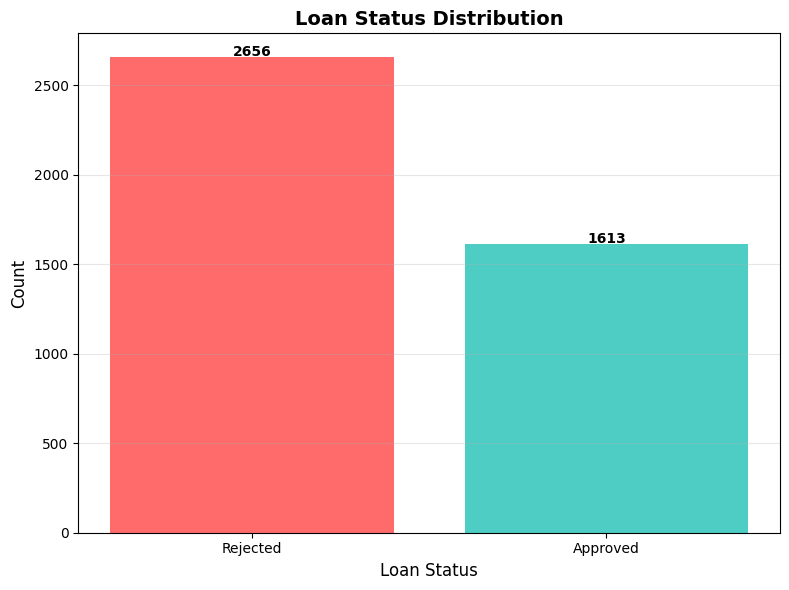

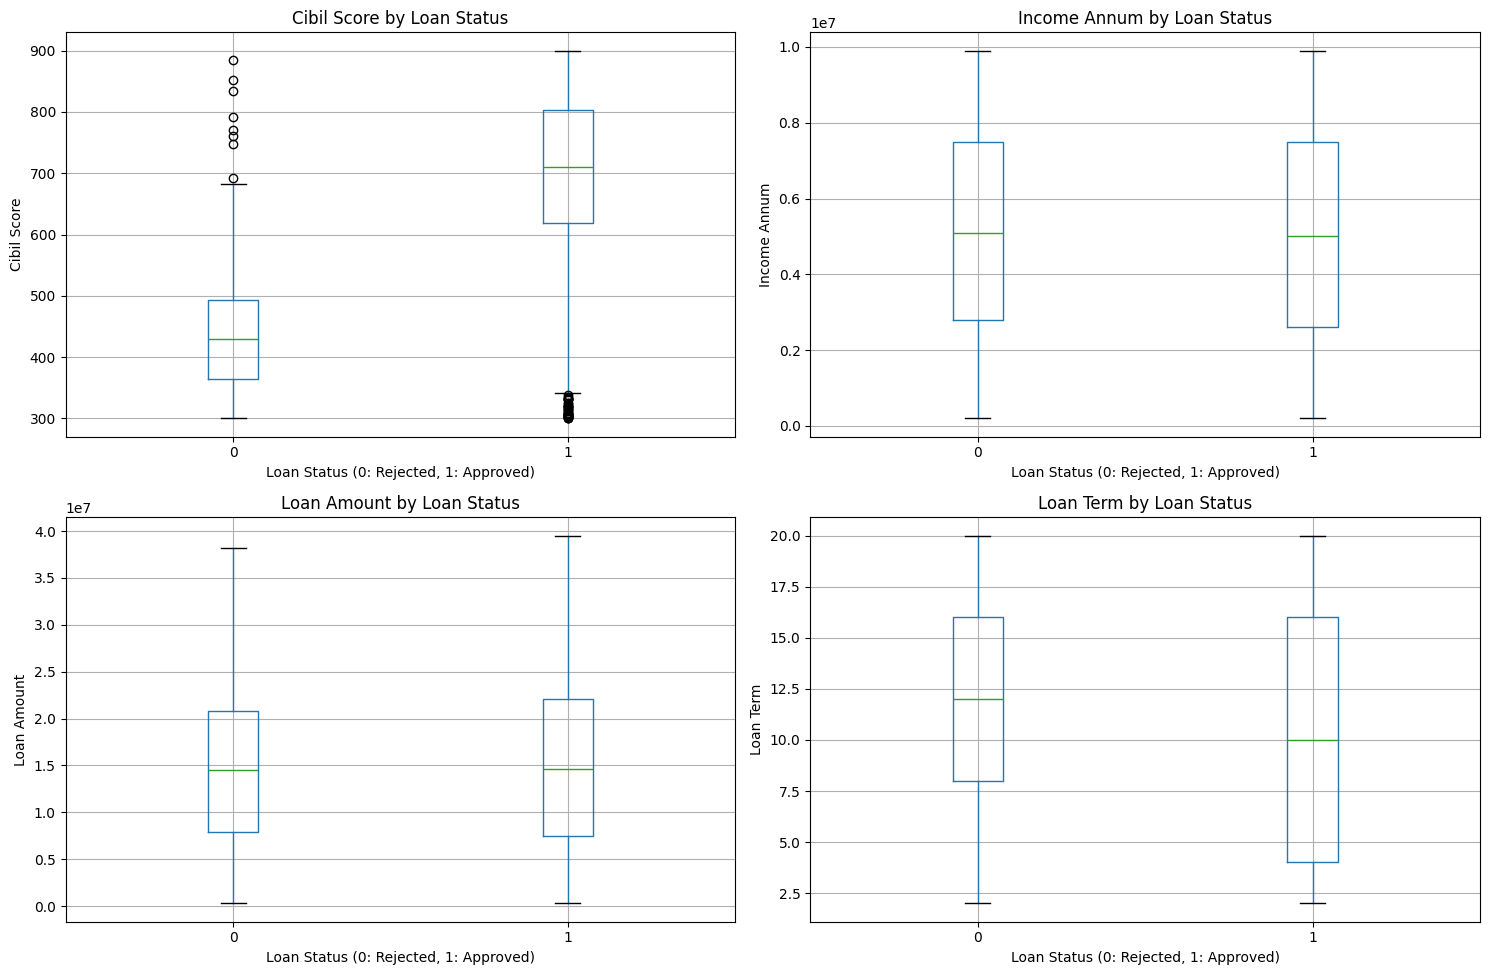

In [8]:
# Step 3: Exploratory Data Analysis
def perform_eda(df):
    """Perform exploratory data analysis"""

    # Select only numeric columns
    df_numeric = df.select_dtypes(include=[np.number])

    if df_numeric.shape[1] < 2:
        print("Not enough numeric columns for EDA")
        return

    # Correlation heatmap
    plt.figure(figsize=(14, 10))
    correlation_matrix = df_numeric.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
                square=True, linewidths=0.5)
    plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Target distribution
    if 'loan_status' in df.columns:
        plt.figure(figsize=(8, 6))
        loan_counts = df['loan_status'].value_counts()
        plt.bar(['Rejected', 'Approved'], loan_counts.values, color=['#FF6B6B', '#4ECDC4'])
        plt.title('Loan Status Distribution', fontsize=14, fontweight='bold')
        plt.xlabel('Loan Status', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.grid(axis='y', alpha=0.3)

        # Add value labels on bars
        for i, v in enumerate(loan_counts.values):
            plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

        plt.tight_layout()
        plt.savefig('loan_status_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

    # Box plots for important features
    important_features = ['cibil_score', 'income_annum', 'loan_amount', 'loan_term']
    available_features = [f for f in important_features if f in df_numeric.columns]

    if len(available_features) > 0 and 'loan_status' in df_numeric.columns:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.ravel()

        for i, feature in enumerate(available_features[:4]):
            if i < len(axes):
                df_numeric.boxplot(column=feature, by='loan_status', ax=axes[i])
                axes[i].set_title(f'{feature.replace("_", " ").title()} by Loan Status')
                axes[i].set_xlabel('Loan Status (0: Rejected, 1: Approved)')
                axes[i].set_ylabel(feature.replace("_", " ").title())

        plt.suptitle('')  # Remove the default title
        plt.tight_layout()
        plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
        plt.show()

print("\n" + "="*80)
print("PERFORMING EXPLORATORY DATA ANALYSIS")
print("="*80)
perform_eda(df_processed)

In [9]:

# Step 4: Prepare Data for Modeling
def prepare_features_target(df):
    """Prepare features and target variable"""

    # Ensure all data is numeric
    df_numeric = df.select_dtypes(include=[np.number])

    # Check if loan_status exists
    if 'loan_status' not in df_numeric.columns:
        raise ValueError("loan_status column not found or not numeric. Available columns: " + str(df_numeric.columns.tolist()))

    # Define features and target
    X = df_numeric.drop('loan_status', axis=1)
    y = df_numeric['loan_status']

    # Remove loan_id if present
    if 'loan_id' in X.columns:
        X = X.drop('loan_id', axis=1)

    print(f"\nFinal feature set ({X.shape[1]} features): {X.columns.tolist()}")
    print(f"Target variable shape: {y.shape}")
    print(f"Target distribution:\n{y.value_counts()}")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Scale numerical features
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )
    X_test_scaled = pd.DataFrame(
        scaler.transform(X_test),
        columns=X_test.columns,
        index=X_test.index
    )

    return X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test, scaler

print("\n" + "="*80)
print("PREPARING DATA FOR MODELING")
print("="*80)
X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_features_target(df_processed)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


PREPARING DATA FOR MODELING

Final feature set (11 features): ['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Target variable shape: (4269,)
Target distribution:
loan_status
1    2656
0    1613
Name: count, dtype: int64
Training set size: (3415, 11)
Test set size: (854, 11)



TRAINING MODELS

[1/5] Training Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

Model: Logistic Regression
Accuracy: 0.9169
Cross-validation Accuracy: 0.9171 (+/- 0.0078)
ROC-AUC Score: 0.9732

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       323
           1       0.93      0.94      0.93       531

    accuracy                           0.92       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.92      0.92      0.92       854



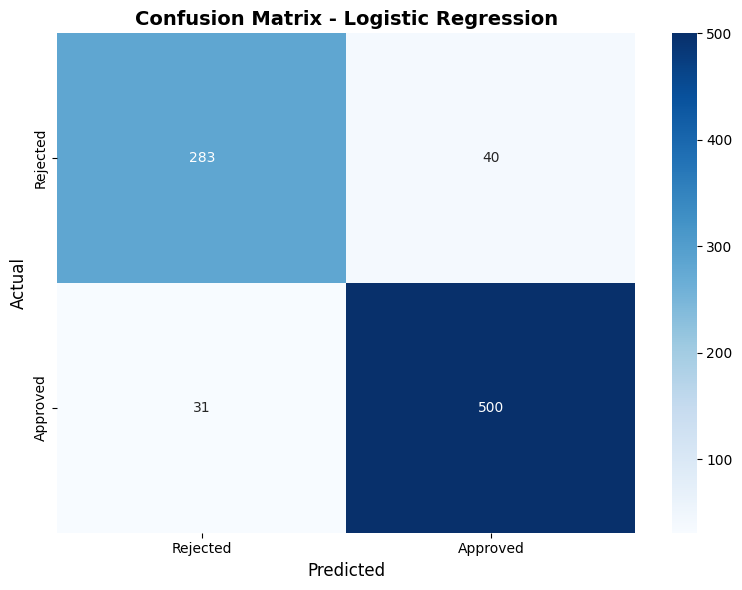

2025/10/13 05:35:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/13 05:35:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[2/5] Training Decision Tree...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

Model: Decision Tree
Accuracy: 0.9824
Cross-validation Accuracy: 0.9789 (+/- 0.0122)
ROC-AUC Score: 0.9849

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       323
           1       0.98      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



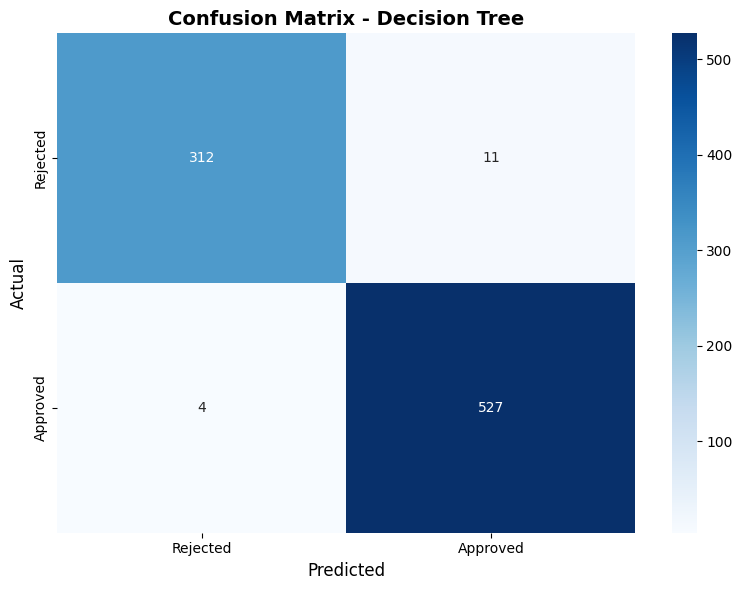

2025/10/13 05:35:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/13 05:35:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


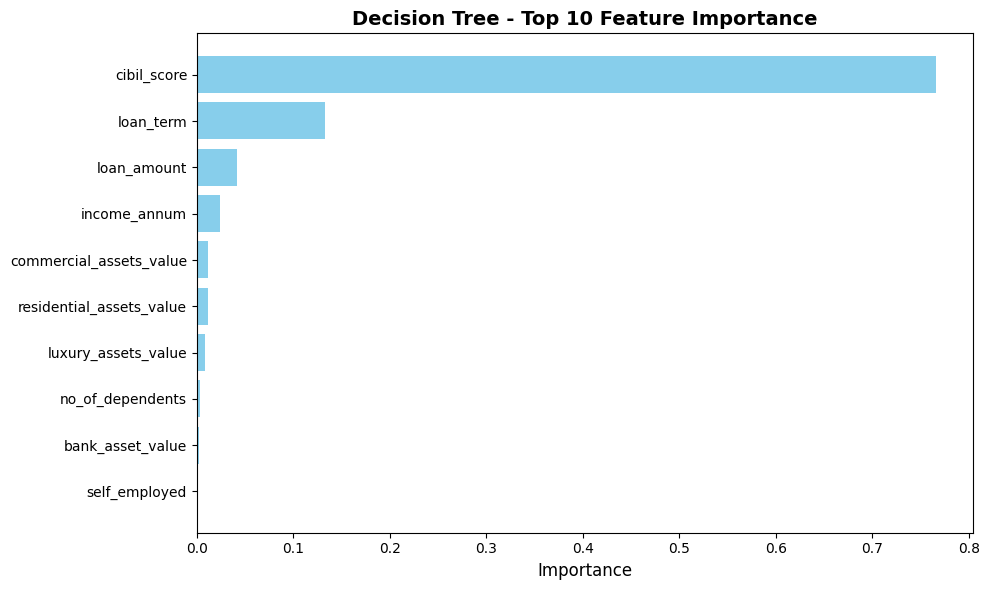


[3/5] Training Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Random Forest: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Model: Random Forest
Accuracy: 0.9813
Cross-validation Accuracy: 0.9804 (+/- 0.0096)
ROC-AUC Score: 0.9990

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       323
           1       0.98      0.99      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



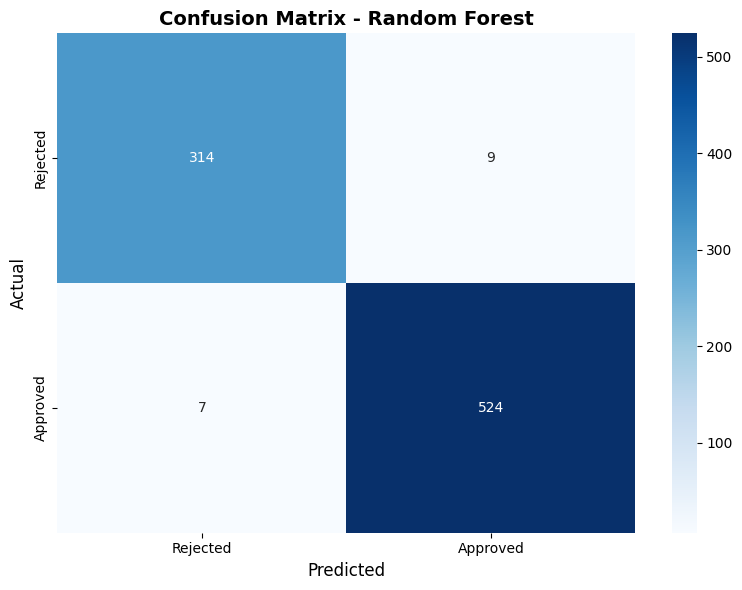

2025/10/13 05:37:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/13 05:37:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


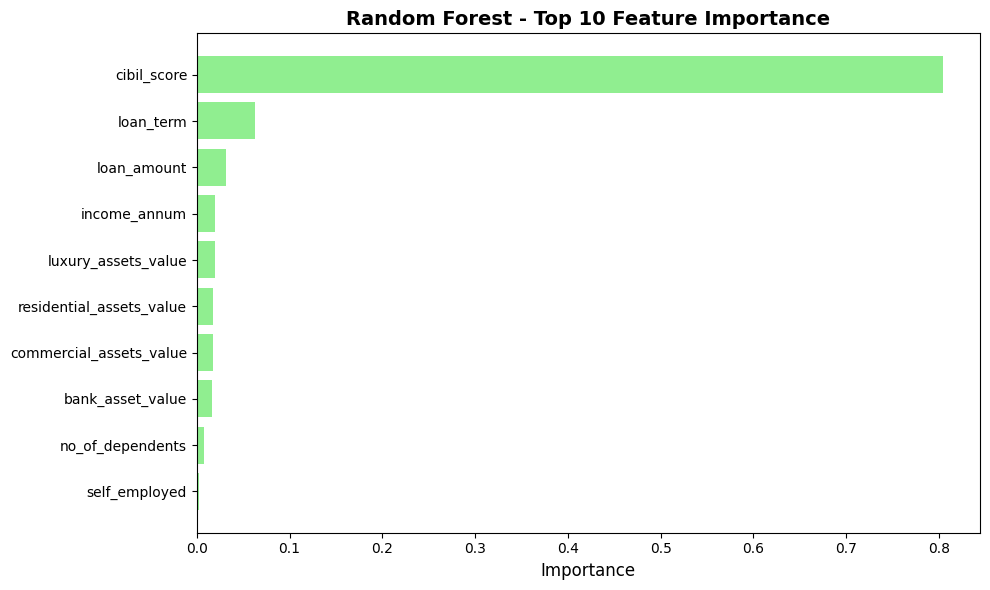


[4/5] Training Gradient Boosting...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Model: Gradient Boosting
Accuracy: 0.9848
Cross-validation Accuracy: 0.9833 (+/- 0.0063)
ROC-AUC Score: 0.9973

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       323
           1       0.99      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



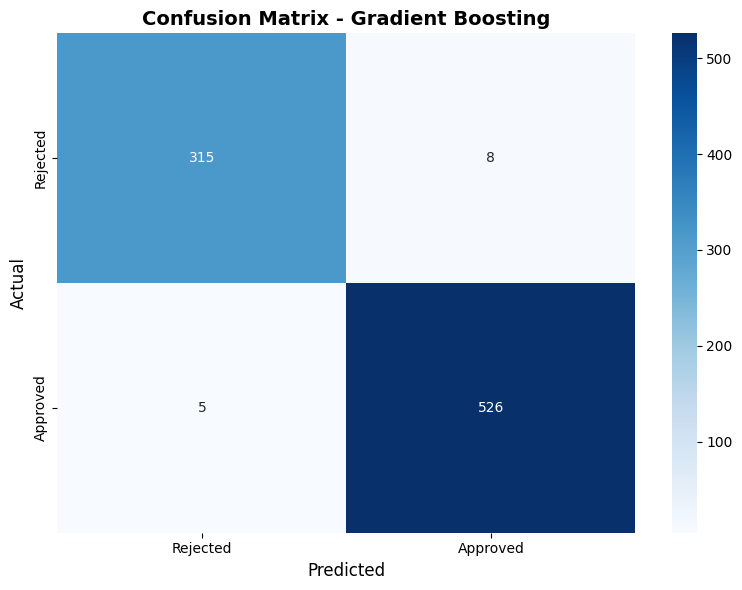

2025/10/13 05:41:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/13 05:41:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



[5/5] Training Support Vector Machine...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Model: Support Vector Machine
Accuracy: 0.9496
Cross-validation Accuracy: 0.9382 (+/- 0.0129)
ROC-AUC Score: 0.9907

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       323
           1       0.96      0.96      0.96       531

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



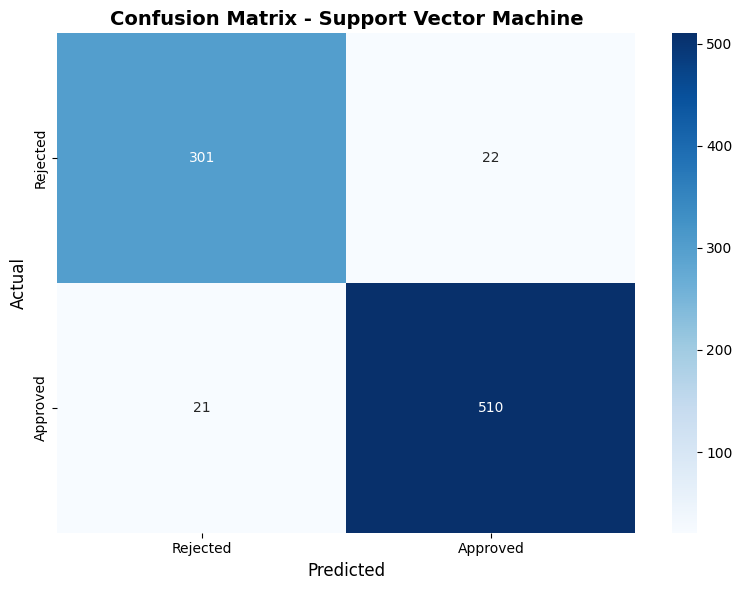

2025/10/13 05:42:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/13 05:42:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



MODEL COMPARISON
                 Model  Accuracy  CV_Accuracy_Mean  CV_Accuracy_Std  ROC_AUC
     Gradient Boosting  0.984778          0.983309         0.003154 0.997295
         Decision Tree  0.982436          0.978917         0.006114 0.984852
         Random Forest  0.981265          0.980381         0.004776 0.998956
Support Vector Machine  0.949649          0.938214         0.006442 0.990654
   Logistic Regression  0.916862          0.917130         0.003885 0.973180


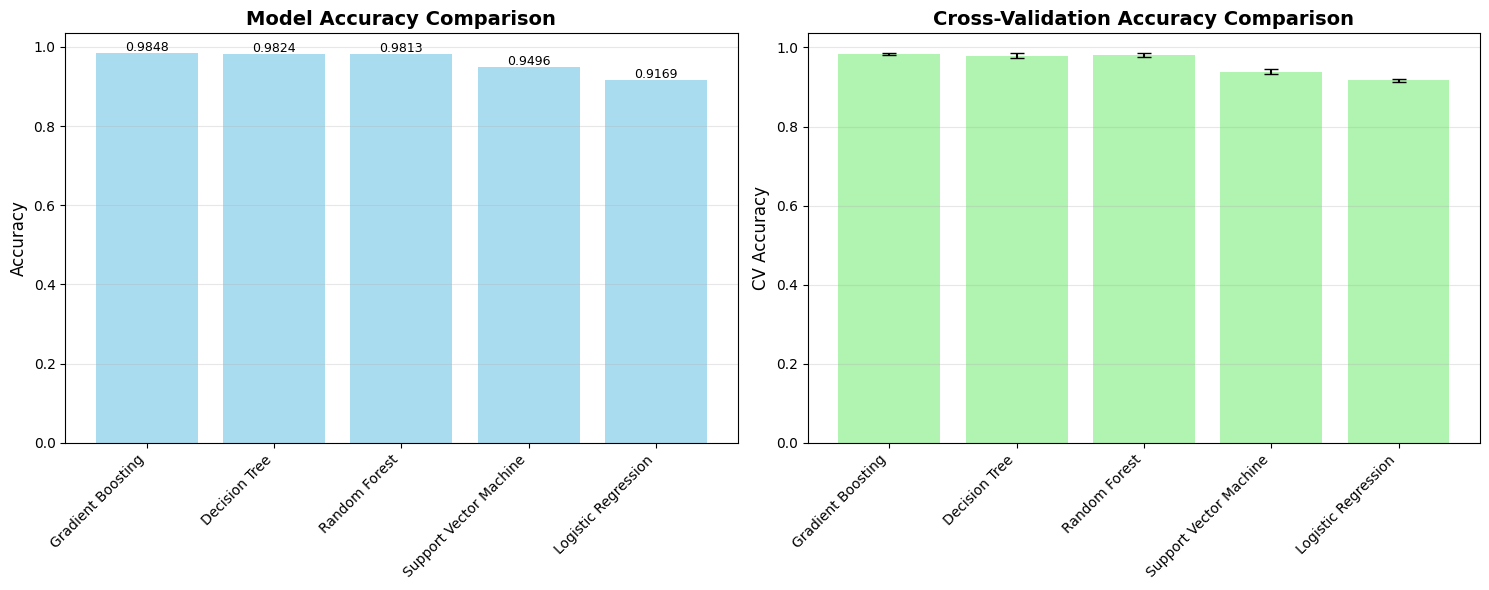


üéØ BEST MODEL: Gradient Boosting
   Accuracy: 0.9848
   CV Accuracy: 0.9833 (+/- 0.0032)
   ROC-AUC: 0.9973

üöÄ Deploying final model: Gradient Boosting


2025/10/13 05:42:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/13 05:42:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/13 05:42:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/13 05:42:29 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/10/13 05:42:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


‚úÖ Final model deployed successfully to MLflow!

PROJECT SUMMARY
Dataset processed: 4269 rows, 13 columns
Models trained: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, SVM
Best model: Gradient Boosting
Best accuracy: 0.9848
Best CV accuracy: 0.9833

 MLflow Tracking URI: file:///content/mlruns


In [10]:


# Step 5: Model Building and Evaluation Functions
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, use_scaled=False):
    """Evaluate model performance"""

    # Use scaled or unscaled data
    X_test_eval = X_test_scaled if use_scaled else X_test
    X_train_eval = X_train_scaled if use_scaled else X_train

    # Make predictions
    y_pred = model.predict(X_test_eval)
    y_pred_proba = model.predict_proba(X_test_eval)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_eval, y_train, cv=5, scoring='accuracy')

    print(f"\n{'='*50}")
    print(f"Model: {model_name}")
    print(f"{'='*50}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    if roc_auc:
        print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"\nClassification Report:\n{classification_rep}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Rejected', 'Approved'],
                yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{model_name.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()

    return {
        'model_name': model_name,
        'model': model,
        'accuracy': accuracy,
        'cv_accuracy_mean': cv_scores.mean(),
        'cv_accuracy_std': cv_scores.std(),
        'roc_auc': roc_auc,
        'classification_report': classification_rep,
        'confusion_matrix': conf_matrix,
        'use_scaled': use_scaled
    }

def train_and_log_model(model, model_name, X_train, y_train, params=None, use_scaled=False):
    """Train model and log to MLflow"""

    with mlflow.start_run(run_name=model_name):
        # Log parameters
        if params:
            mlflow.log_params(params)

        # Use scaled or unscaled data
        X_train_data = X_train_scaled if use_scaled else X_train

        # Train model
        model.fit(X_train_data, y_train)

        # Make predictions
        X_test_data = X_test_scaled if use_scaled else X_test
        y_pred = model.predict(X_test_data)
        y_pred_proba = model.predict_proba(X_test_data)[:, 1] if hasattr(model, 'predict_proba') else None

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
        cv_scores = cross_val_score(model, X_train_data, y_train, cv=5, scoring='accuracy')

        # Log metrics
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("cv_accuracy_mean", cv_scores.mean())
        mlflow.log_metric("cv_accuracy_std", cv_scores.std())
        if roc_auc:
            mlflow.log_metric("roc_auc", roc_auc)

        # Log model
        mlflow.sklearn.log_model(model, model_name)

        # Log feature importance for tree-based models
        if hasattr(model, 'feature_importances_'):
            feature_importance = pd.DataFrame({
                'feature': X_train.columns,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=False)

            importance_file = f"{model_name}_feature_importance.csv"
            feature_importance.to_csv(importance_file, index=False)
            mlflow.log_artifact(importance_file)

        return model

# Step 6: Train Individual Models

print("\n" + "="*80)
print("TRAINING MODELS")
print("="*80)

# 6.1 Logistic Regression
print("\n[1/5] Training Logistic Regression...")
lr_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000]
}
lr_grid = GridSearchCV(
    LogisticRegression(random_state=42),
    lr_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
lr_grid.fit(X_train_scaled, y_train)
print("Best parameters for Logistic Regression:", lr_grid.best_params_)
lr_best = lr_grid.best_estimator_
lr_results = evaluate_model(lr_best, X_train, X_test, y_train, y_test, "Logistic Regression", use_scaled=True)
train_and_log_model(lr_best, "Logistic_Regression", X_train, y_train, lr_grid.best_params_, use_scaled=True)

# 6.2 Decision Tree
print("\n[2/5] Training Decision Tree...")
dt_params = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
dt_grid.fit(X_train, y_train)
print("Best parameters for Decision Tree:", dt_grid.best_params_)
dt_best = dt_grid.best_estimator_
dt_results = evaluate_model(dt_best, X_train, X_test, y_train, y_test, "Decision Tree", use_scaled=False)
train_and_log_model(dt_best, "Decision_Tree", X_train, y_train, dt_grid.best_params_, use_scaled=False)

# Plot feature importance for Decision Tree
plt.figure(figsize=(10, 6))
feature_importance_dt = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt_best.feature_importances_
}).sort_values('importance', ascending=True).tail(10)
plt.barh(feature_importance_dt['feature'], feature_importance_dt['importance'], color='skyblue')
plt.title('Decision Tree - Top 10 Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance', fontsize=12)
plt.tight_layout()
plt.savefig('dt_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# 6.3 Random Forest
print("\n[3/5] Training Random Forest...")
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_
rf_results = evaluate_model(rf_best, X_train, X_test, y_train, y_test, "Random Forest", use_scaled=False)
train_and_log_model(rf_best, "Random_Forest", X_train, y_train, rf_grid.best_params_, use_scaled=False)

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 6))
feature_importance_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_best.feature_importances_
}).sort_values('importance', ascending=True).tail(10)
plt.barh(feature_importance_rf['feature'], feature_importance_rf['importance'], color='lightgreen')
plt.title('Random Forest - Top 10 Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance', fontsize=12)
plt.tight_layout()
plt.savefig('rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# 6.4 Gradient Boosting
print("\n[4/5] Training Gradient Boosting...")
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
gb_grid.fit(X_train, y_train)
print("Best parameters for Gradient Boosting:", gb_grid.best_params_)
gb_best = gb_grid.best_estimator_
gb_results = evaluate_model(gb_best, X_train, X_test, y_train, y_test, "Gradient Boosting", use_scaled=False)
train_and_log_model(gb_best, "Gradient_Boosting", X_train, y_train, gb_grid.best_params_, use_scaled=False)

# 6.5 Support Vector Machine
print("\n[5/5] Training Support Vector Machine...")
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale']
}
svm_grid = GridSearchCV(
    SVC(probability=True, random_state=42),
    svm_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
svm_grid.fit(X_train_scaled, y_train)
print("Best parameters for SVM:", svm_grid.best_params_)
svm_best = svm_grid.best_estimator_
svm_results = evaluate_model(svm_best, X_train, X_test, y_train, y_test, "Support Vector Machine", use_scaled=True)
train_and_log_model(svm_best, "Support_Vector_Machine", X_train, y_train, svm_grid.best_params_, use_scaled=True)

# Step 7: Model Comparison and Selection
def compare_models(results_list):
    """Compare all models and select the best one"""

    comparison_df = pd.DataFrame([{
        'Model': result['model_name'],
        'Accuracy': result['accuracy'],
        'CV_Accuracy_Mean': result['cv_accuracy_mean'],
        'CV_Accuracy_Std': result['cv_accuracy_std'],
        'ROC_AUC': result.get('roc_auc', 0)
    } for result in results_list])

    comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

    print("\n" + "="*80)
    print("MODEL COMPARISON")
    print("="*80)
    print(comparison_df.to_string(index=False))

    # Save comparison to CSV
    comparison_df.to_csv('model_comparison.csv', index=False)

    # Visual comparison
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Accuracy comparison
    models = comparison_df['Model']
    accuracy = comparison_df['Accuracy']
    axes[0].bar(range(len(models)), accuracy, color='skyblue', alpha=0.7)
    axes[0].set_xticks(range(len(models)))
    axes[0].set_xticklabels(models, rotation=45, ha='right')
    axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Accuracy', fontsize=12)
    axes[0].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(accuracy):
        axes[0].text(i, v + 0.005, f'{v:.4f}', ha='center', fontsize=9)

    # CV Accuracy comparison with error bars
    axes[1].bar(range(len(models)), comparison_df['CV_Accuracy_Mean'],
                yerr=comparison_df['CV_Accuracy_Std'],
                capsize=5, color='lightgreen', alpha=0.7)
    axes[1].set_xticks(range(len(models)))
    axes[1].set_xticklabels(models, rotation=45, ha='right')
    axes[1].set_title('Cross-Validation Accuracy Comparison', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('CV Accuracy', fontsize=12)
    axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Select best model
    best_idx = comparison_df.index[0]
    best_model_info = results_list[best_idx]

    print(f"\nüéØ BEST MODEL: {best_model_info['model_name']}")
    print(f"   Accuracy: {best_model_info['accuracy']:.4f}")
    print(f"   CV Accuracy: {best_model_info['cv_accuracy_mean']:.4f} (+/- {best_model_info['cv_accuracy_std']:.4f})")
    if best_model_info.get('roc_auc'):
        print(f"   ROC-AUC: {best_model_info['roc_auc']:.4f}")

    return best_model_info

# Compare all models
all_results = [lr_results, dt_results, rf_results, gb_results, svm_results]
best_model_info = compare_models(all_results)

# Step 8: Deploy Final Model
def deploy_final_model(best_model_info, X_train, y_train, scaler):
    """Deploy the best model with MLflow"""

    print(f"\nüöÄ Deploying final model: {best_model_info['model_name']}")

    with mlflow.start_run(run_name="FINAL_DEPLOYED_MODEL"):
        final_model = best_model_info['model']

        # Use appropriate data
        X_train_data = X_train_scaled if best_model_info['use_scaled'] else X_train
        final_model.fit(X_train_data, y_train)

        # Log model details
        mlflow.log_param("final_model_type", best_model_info['model_name'])
        mlflow.log_metric("final_accuracy", best_model_info['accuracy'])
        mlflow.log_metric("final_cv_accuracy", best_model_info['cv_accuracy_mean'])

        if best_model_info.get('roc_auc'):
            mlflow.log_metric("final_roc_auc", best_model_info['roc_auc'])

        # Log the final model
        mlflow.sklearn.log_model(final_model, "deployed_model")
        mlflow.sklearn.log_model(scaler, "scaler")

        # Log feature names
        mlflow.log_param("feature_names", list(X_train.columns))
        mlflow.log_param("used_scaled_data", best_model_info['use_scaled'])

        print("‚úÖ Final model deployed successfully to MLflow!")

        return final_model

final_model = deploy_final_model(best_model_info, X_train, y_train, scaler)

# Step 9: Model Inference Function
def predict_loan_approval(model, scaler, input_data, feature_columns, use_scaled=False):
    """Make predictions using the deployed model"""

    # Create DataFrame from input
    input_df = pd.DataFrame([input_data])

    # Encode categorical variables
    if 'education' in input_df.columns:
        input_df['education'] = input_df['education'].map({'Graduate': 1, 'Not Graduate': 0})

    if 'self_employed' in input_df.columns:
        input_df['self_employed'] = input_df['self_employed'].map({'Yes': 1, 'No': 0})

    # Remove loan_id if present
    if 'loan_id' in input_df.columns:
        input_df = input_df.drop('loan_id', axis=1)

    # Ensure correct feature order
    input_df = input_df[feature_columns]

    # Scale if needed
    if use_scaled:
        input_processed = scaler.transform(input_df)
    else:
        input_processed = input_df.values

    # Make prediction
    prediction = model.predict(input_processed)
    probability = model.predict_proba(input_processed)

    return {
        'prediction': 'Approved' if prediction[0] == 1 else 'Rejected',
        'approval_probability': probability[0][1],
        'rejection_probability': probability[0][0]
    }

# Example usage
example_input = {
    'no_of_dependents': 2,
    'education': 'Graduate',
    'self_employed': 'No',
    'income_annum': 9600000,
    'loan_amount': 29900000,
    'loan_term': 12,
    'cibil_score': 778,
    'residential_assets_value': 2400000,
    'commercial_assets_value': 17600000,
    'luxury_assets_value': 22700000,
    'bank_asset_value': 8000000
}

prediction_result = predict_loan_approval(
    final_model,
    scaler,
    example_input,
    X_train.columns,
    use_scaled=best_model_info['use_scaled']
)


# Step 10: Summary
print("\n" + "="*80)
print("PROJECT SUMMARY")
print("="*80)
print(f"Dataset processed: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Models trained: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, SVM")
print(f"Best model: {best_model_info['model_name']}")
print(f"Best accuracy: {best_model_info['accuracy']:.4f}")
print(f"Best CV accuracy: {best_model_info['cv_accuracy_mean']:.4f}")
print(f"\n MLflow Tracking URI: {mlflow.get_tracking_uri()}")



MODEL EXPLAINABILITY AND INTERPRETABILITY

Initializing explainability for best model: Gradient Boosting

GENERATING EXPLAINABILITY REPORT FOR Gradient Boosting

--------------------------------------------------
SHAP ANALYSIS
--------------------------------------------------


  0%|          | 0/854 [00:00<?, ?it/s]

<Figure size 1000x800 with 0 Axes>

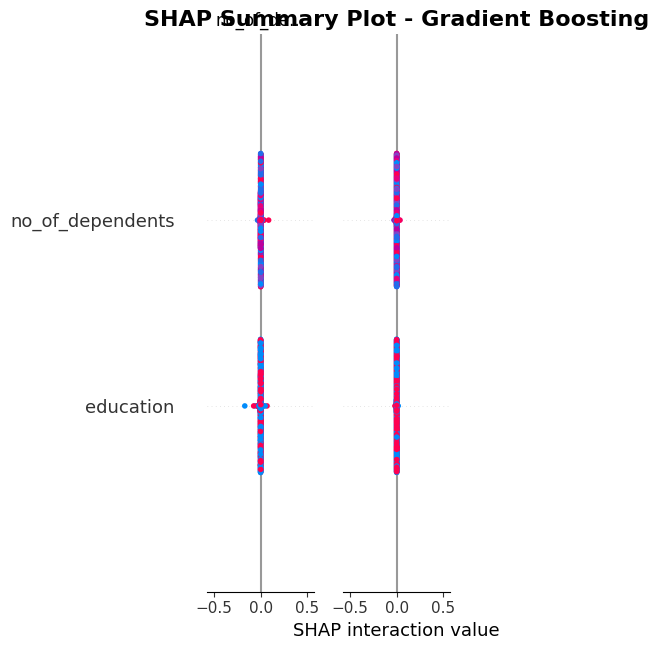

<Figure size 1000x600 with 0 Axes>

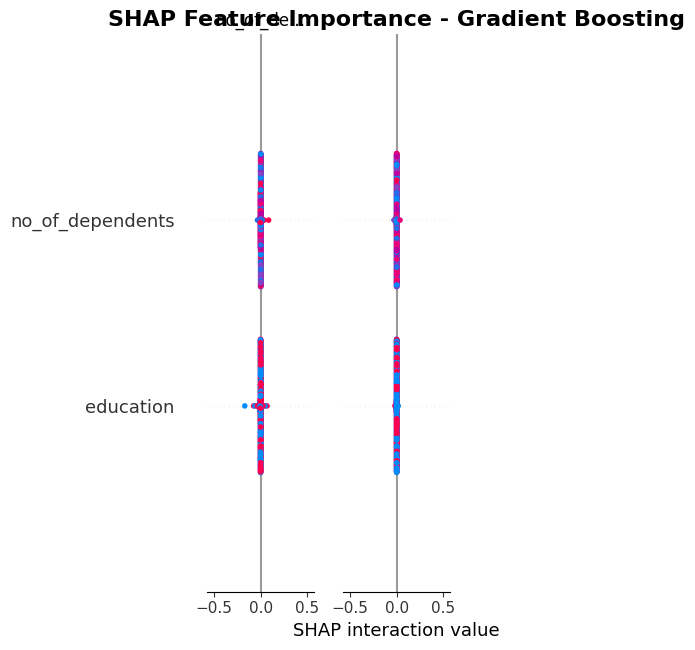


Individual Prediction Explanations (First 3 instances):

Instance 1: Actual=Rejected, Predicted=Approved
SHAP analysis failed: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

--------------------------------------------------
LIME EXPLANATIONS
--------------------------------------------------
LIME Explanations for first 3 instances:

--- Instance 1 ---
Actual: Rejected
Prediction probabilities: [5.39043337e-04 9.99460957e-01]


<Figure size 1200x400 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

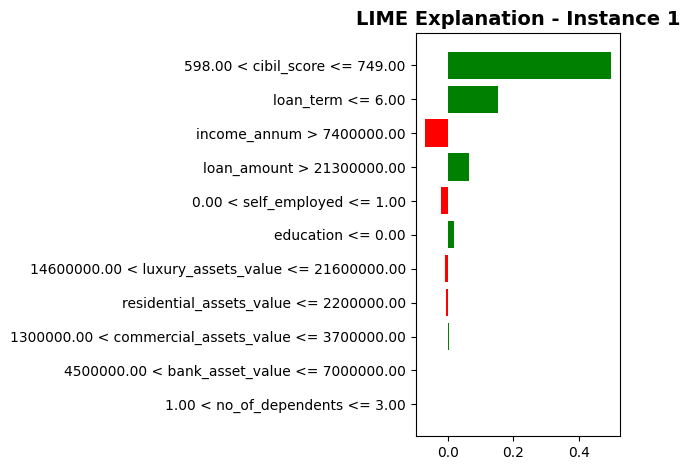

Feature contributions:
  598.00 < cibil_score <= 749.00: 0.4971
  loan_term <= 6.00: 0.1537
  income_annum > 7400000.00: -0.0704
  loan_amount > 21300000.00: 0.0643
  0.00 < self_employed <= 1.00: -0.0226
  education <= 0.00: 0.0173
  14600000.00 < luxury_assets_value <= 21600000.00: -0.0105
  residential_assets_value <= 2200000.00: -0.0047
  1300000.00 < commercial_assets_value <= 3700000.00: 0.0044
  4500000.00 < bank_asset_value <= 7000000.00: 0.0013
  1.00 < no_of_dependents <= 3.00: -0.0012

--- Instance 2 ---
Actual: Rejected
Prediction probabilities: [0.99875542 0.00124458]


<Figure size 1000x600 with 0 Axes>

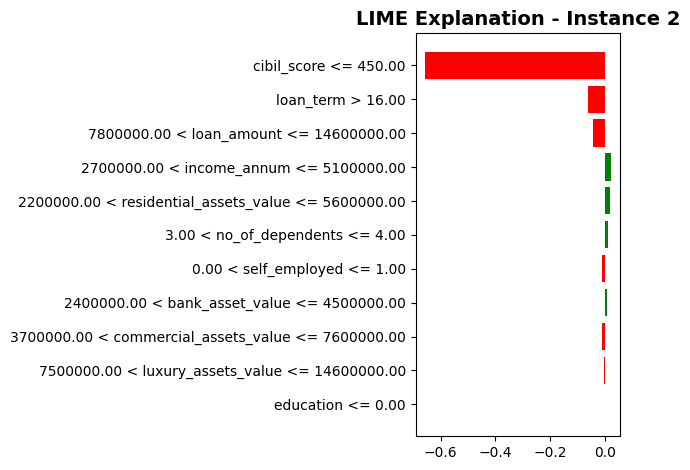

Feature contributions:
  cibil_score <= 450.00: -0.6579
  loan_term > 16.00: -0.0599
  7800000.00 < loan_amount <= 14600000.00: -0.0409
  2700000.00 < income_annum <= 5100000.00: 0.0222
  2200000.00 < residential_assets_value <= 5600000.00: 0.0179
  3.00 < no_of_dependents <= 4.00: 0.0132
  0.00 < self_employed <= 1.00: -0.0088
  2400000.00 < bank_asset_value <= 4500000.00: 0.0083
  3700000.00 < commercial_assets_value <= 7600000.00: -0.0079
  7500000.00 < luxury_assets_value <= 14600000.00: -0.0028
  education <= 0.00: 0.0014

--- Instance 3 ---
Actual: Rejected
Prediction probabilities: [9.99445847e-01 5.54153371e-04]


<Figure size 1000x600 with 0 Axes>

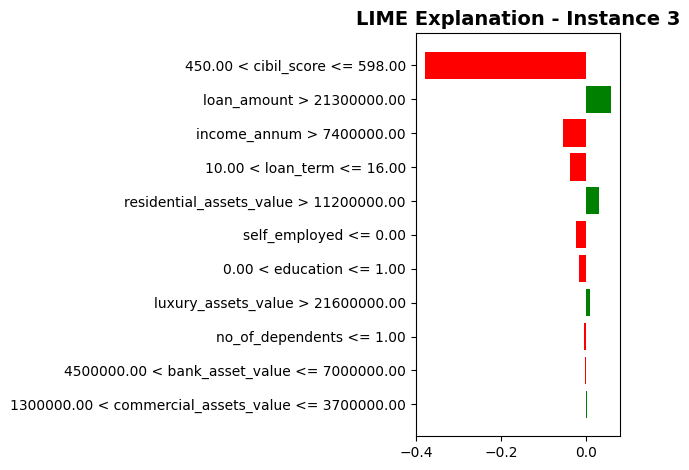

Feature contributions:
  450.00 < cibil_score <= 598.00: -0.3791
  loan_amount > 21300000.00: 0.0577
  income_annum > 7400000.00: -0.0552
  10.00 < loan_term <= 16.00: -0.0381
  residential_assets_value > 11200000.00: 0.0298
  self_employed <= 0.00: -0.0240
  0.00 < education <= 1.00: -0.0160
  luxury_assets_value > 21600000.00: 0.0081
  no_of_dependents <= 1.00: -0.0048
  4500000.00 < bank_asset_value <= 7000000.00: -0.0039
  1300000.00 < commercial_assets_value <= 3700000.00: 0.0008

--------------------------------------------------
PARTIAL DEPENDENCE ANALYSIS
--------------------------------------------------


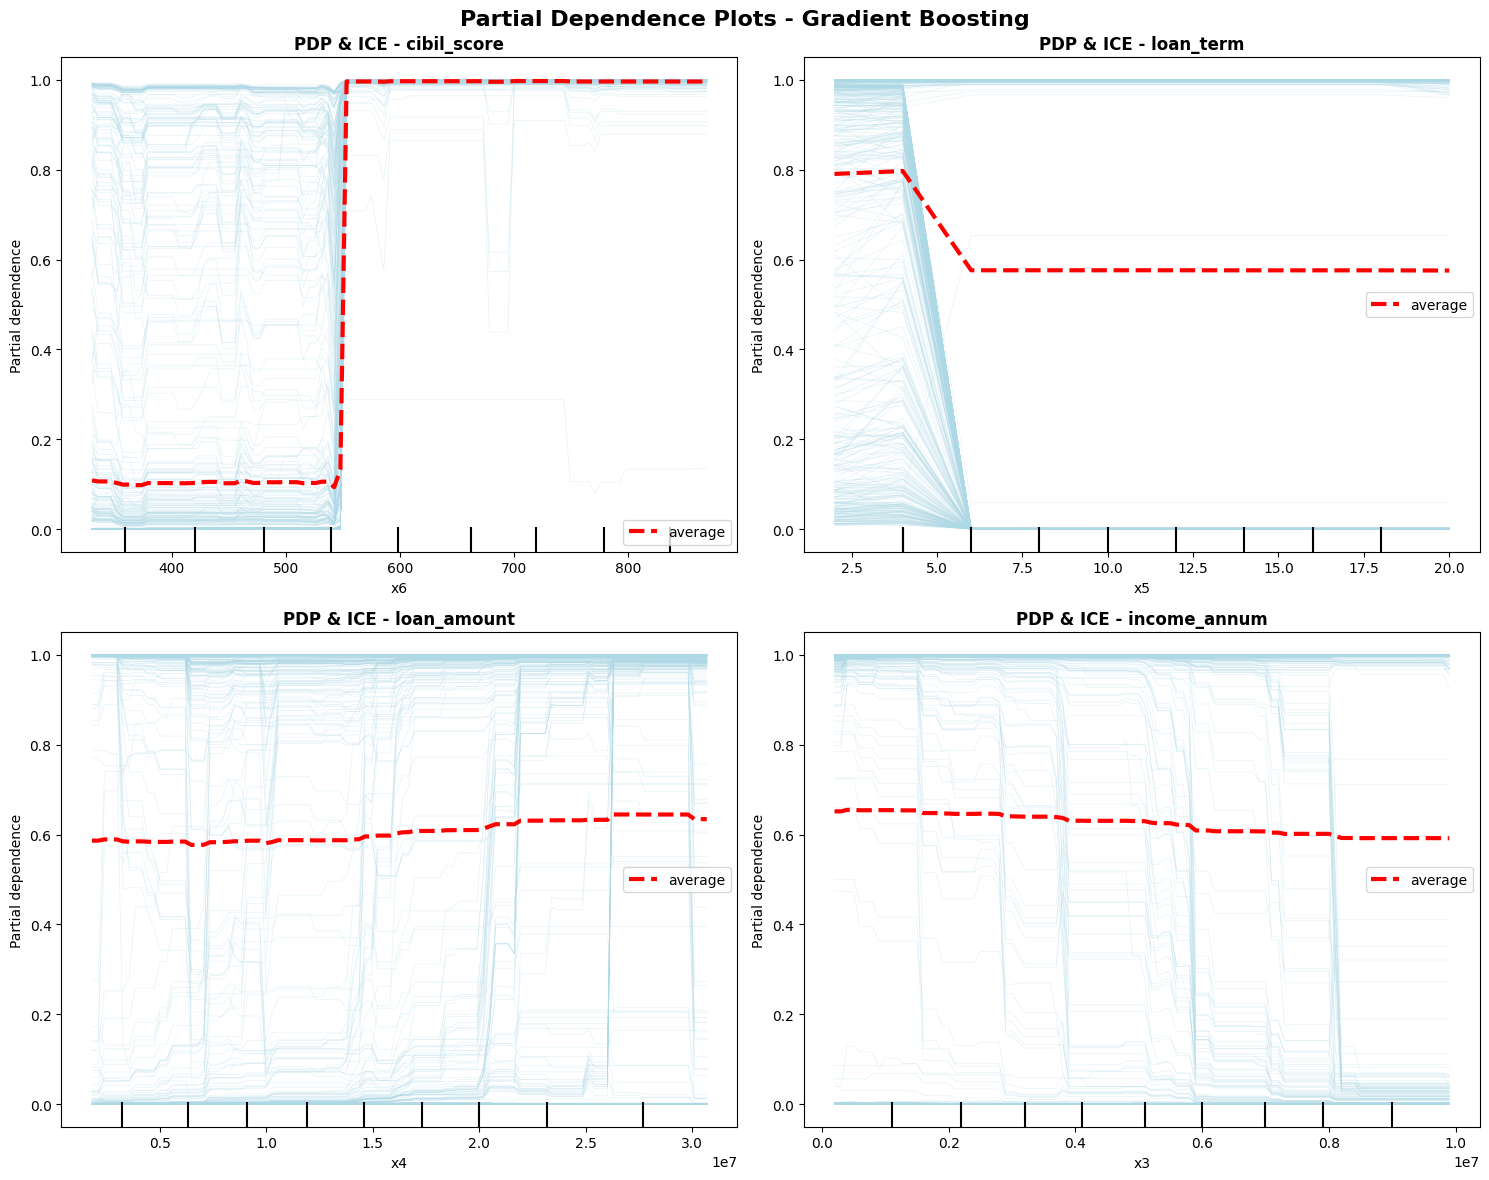

Top features analyzed: ['cibil_score', 'loan_term', 'loan_amount', 'income_annum']

--------------------------------------------------
PERMUTATION IMPORTANCE
--------------------------------------------------


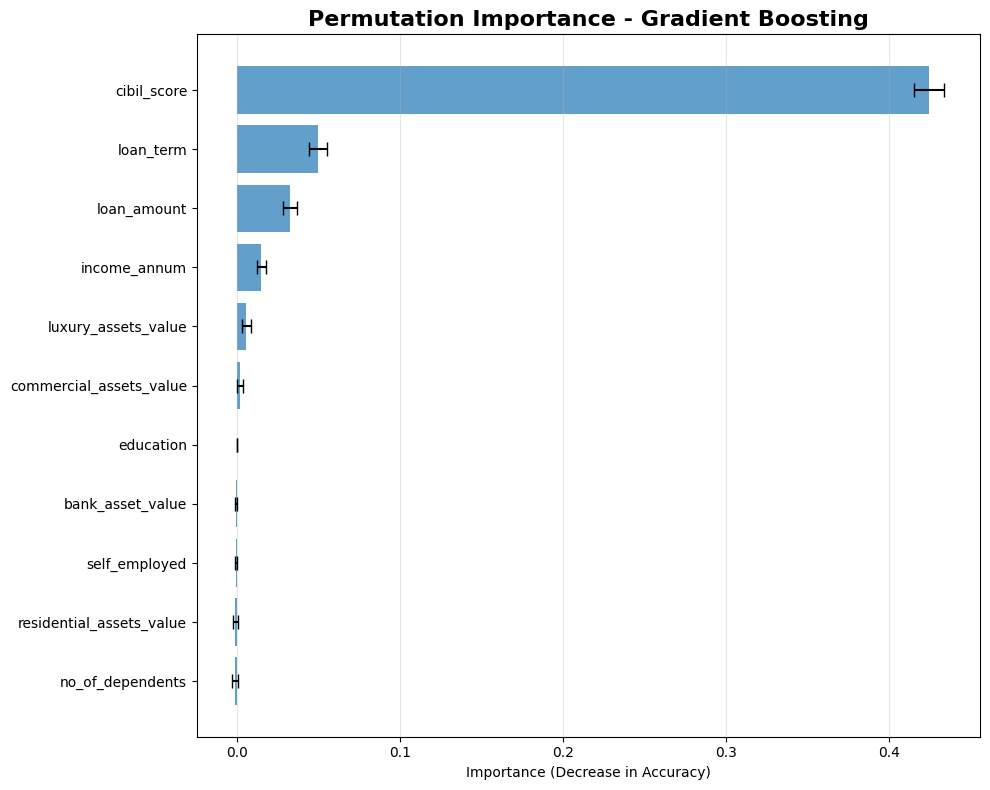


Permutation Importance Results:
  no_of_dependents: -0.0012 ¬± 0.0017
  residential_assets_value: -0.0012 ¬± 0.0015
  self_employed: -0.0007 ¬± 0.0006
  bank_asset_value: -0.0007 ¬± 0.0006
  education: 0.0000 ¬± 0.0000
  commercial_assets_value: 0.0019 ¬± 0.0018
  luxury_assets_value: 0.0056 ¬± 0.0027
  income_annum: 0.0150 ¬± 0.0030
  loan_amount: 0.0323 ¬± 0.0042
  loan_term: 0.0496 ¬± 0.0055
  cibil_score: 0.4248 ¬± 0.0092

--------------------------------------------------
ACCUMULATED LOCAL EFFECTS (ALE)
--------------------------------------------------


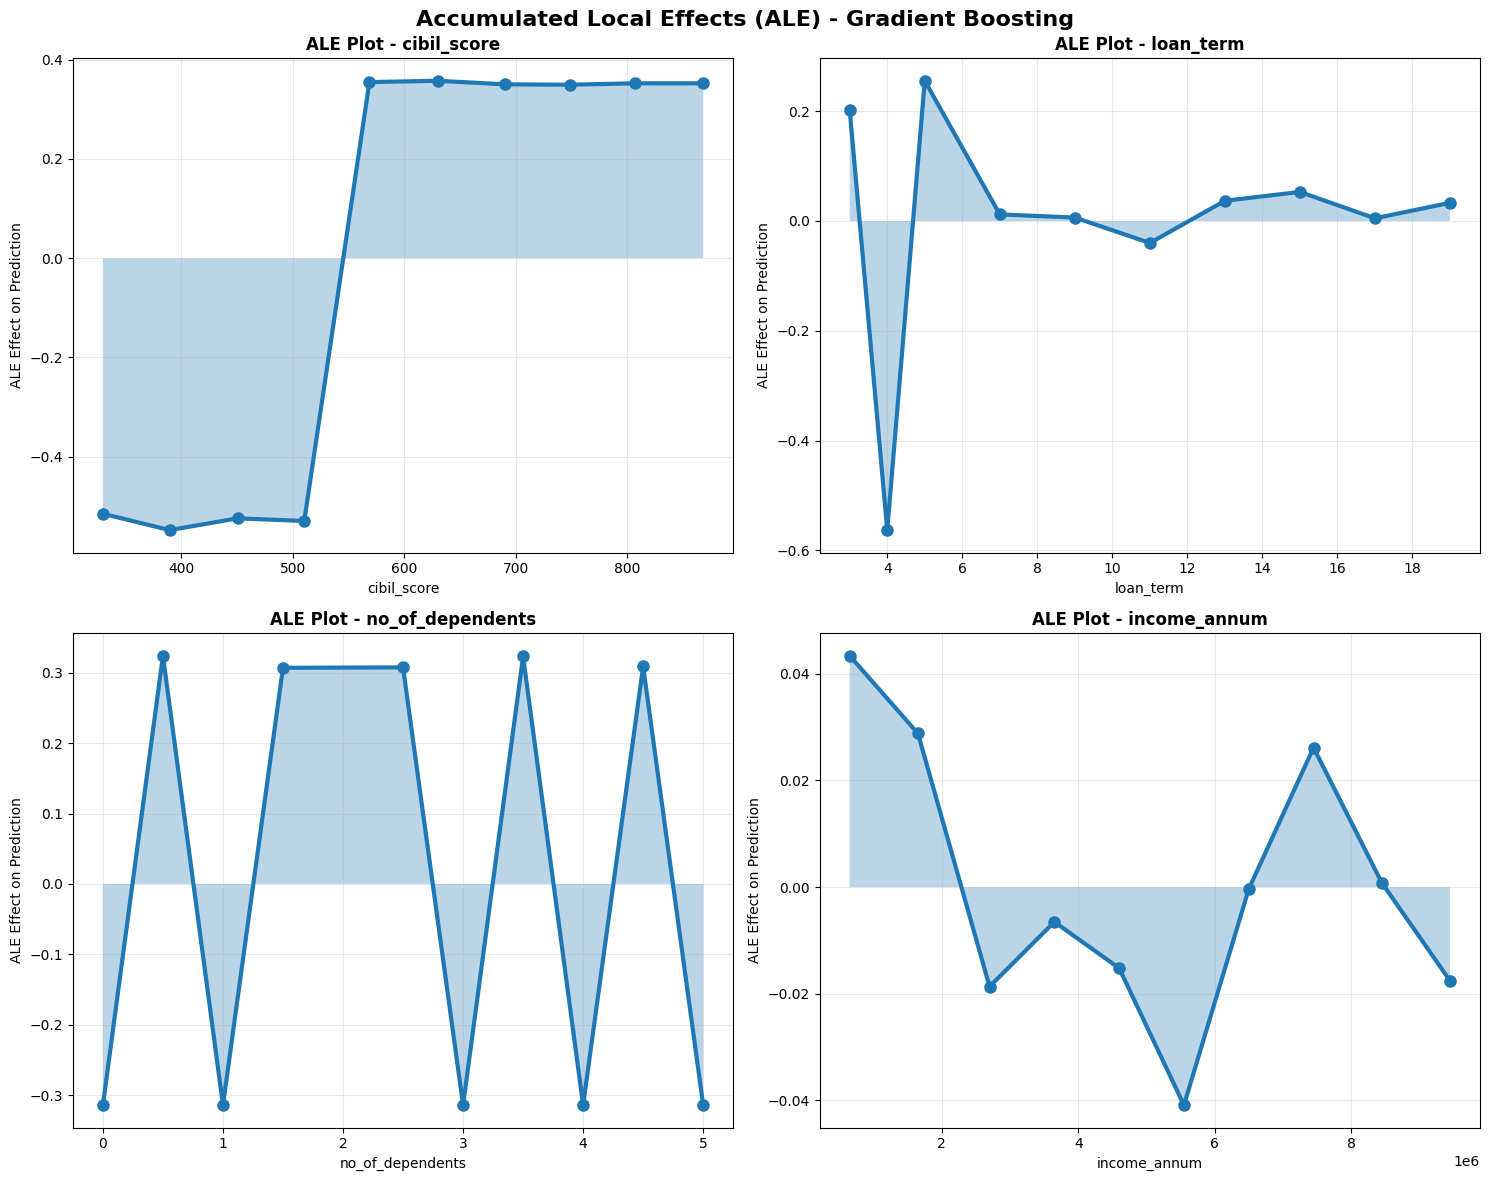

ALE plots created for features: ['cibil_score', 'loan_term', 'no_of_dependents', 'income_annum']

--------------------------------------------------
ANCHOR EXPLANATIONS
--------------------------------------------------
Anchor-style Explanations (Rule-based):

Rule 1:
  IF cibil_score > 712.00
  THEN Higher probability of approval
  (Approved median: 712.00, Rejected median: 434.00)

Rule 2:
  IF loan_term > 10.00
  THEN Higher probability of approval
  (Approved median: 10.00, Rejected median: 12.00)

Rule 3:
  IF loan_amount > 14600000.00
  THEN Higher probability of approval
  (Approved median: 14600000.00, Rejected median: 14100000.00)


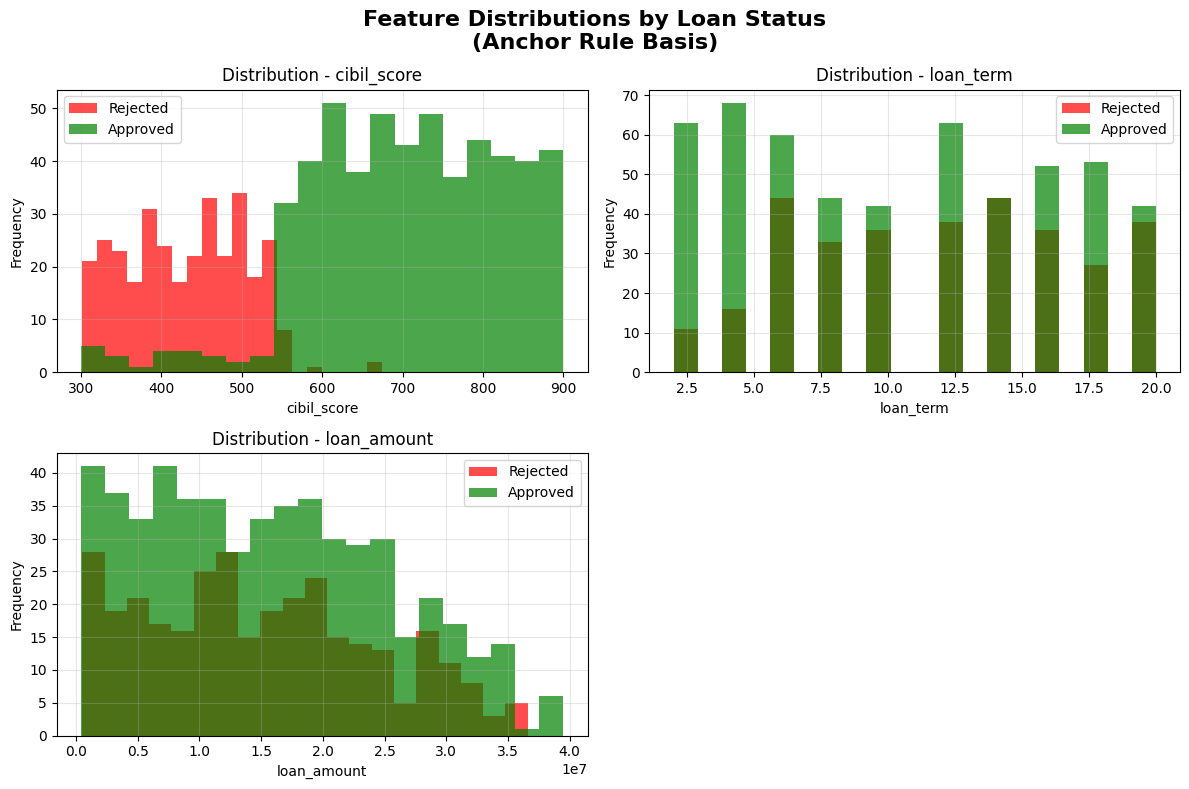


--------------------------------------------------
COMPREHENSIVE FEATURE ANALYSIS
--------------------------------------------------


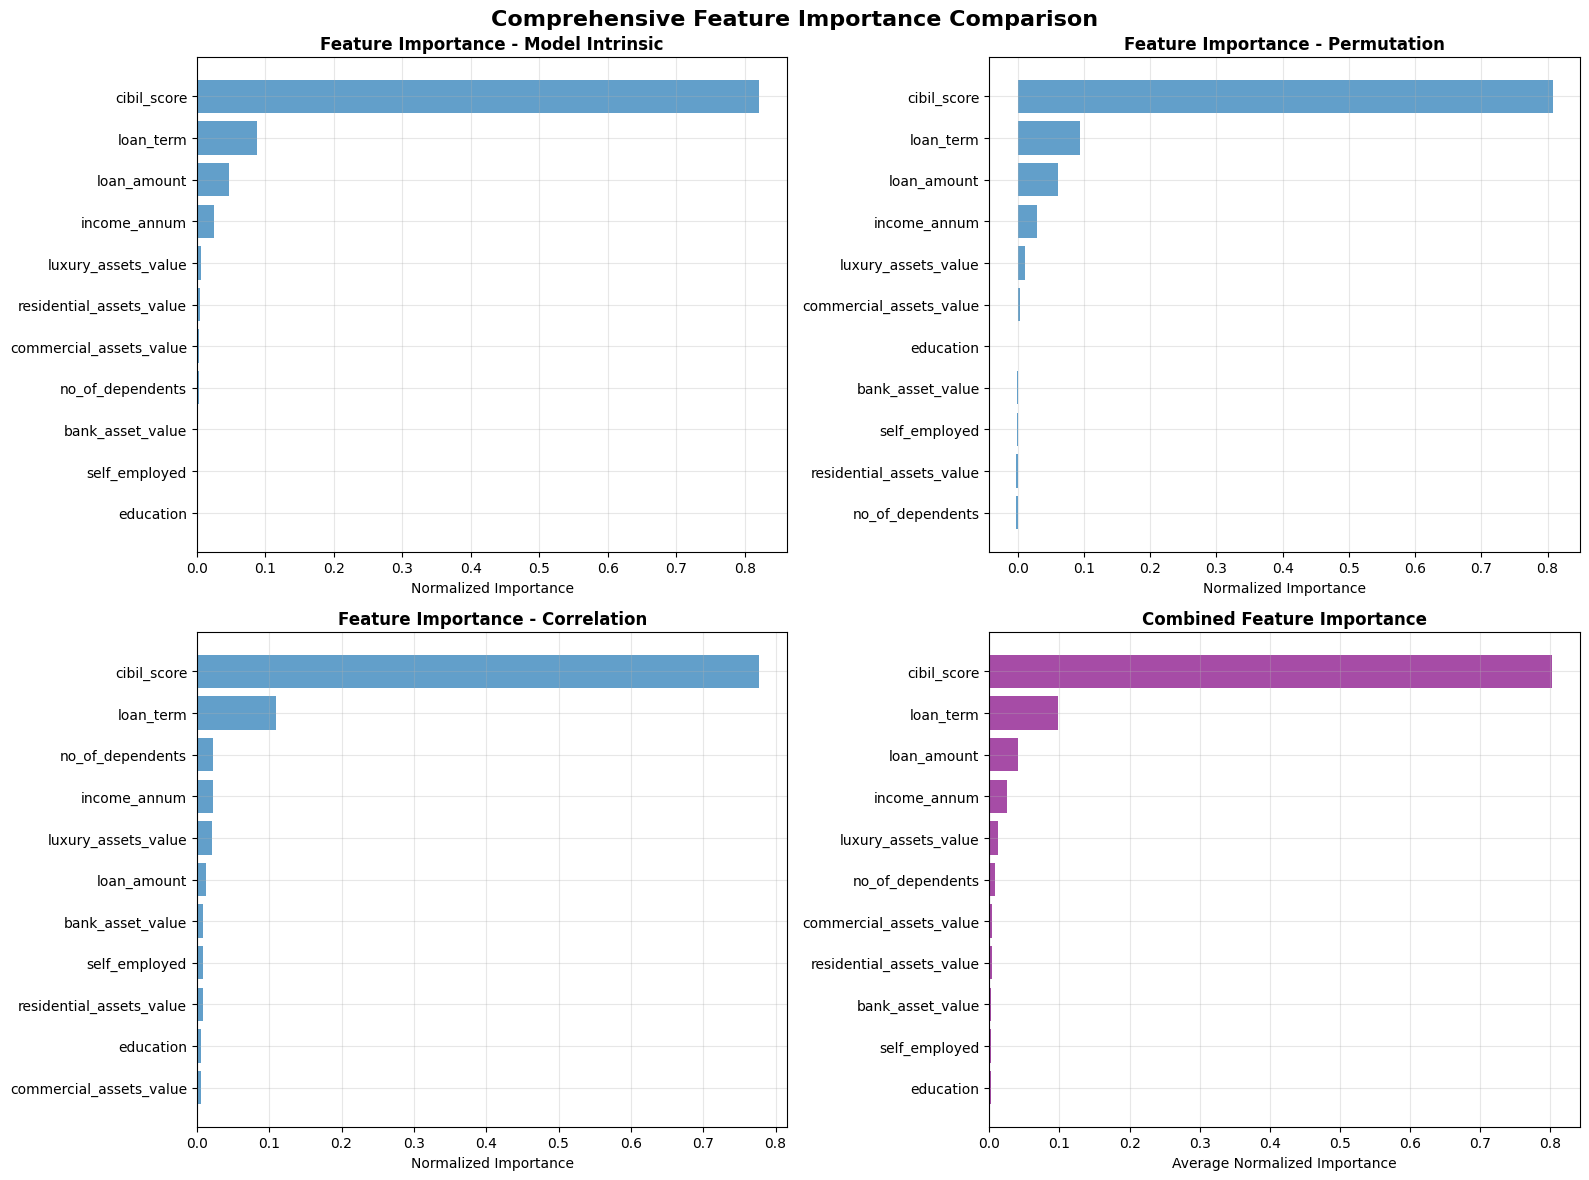


Top 5 Most Important Features (Combined):
  1. 6: 0.8024
  2. 5: 0.0972
  3. 4: 0.0407
  4. 3: 0.0253
  5. 9: 0.0124

EXPLAINABILITY METHODS SUMMARY

        Methods Used and Their Purposes:
        
        1. SHAP (SHapley Additive exPlanations):
           - Purpose: Both global and local feature importance using game theory
           - Strengths: Theoretical foundation, handles feature dependencies
           - Use Case: Understanding overall model behavior and individual predictions
        
        2. LIME (Local Interpretable Model-agnostic Explanations):
           - Purpose: Local explanations for individual predictions
           - Strengths: Model-agnostic, easy to interpret
           - Use Case: Explaining why a specific loan was approved/rejected
        
        3. Partial Dependence Plots (PDP):
           - Purpose: Show relationship between features and predictions
           - Strengths: Handles non-linear relationships, intuitive
           - Use Case: Understandi

In [25]:
# =============================================================================
# STEP 11: MODEL EXPLAINABILITY AND INTERPRETABILITY
# =============================================================================

import shap
import lime
import lime.lime_tabular
from sklearn.inspection import PartialDependenceDisplay
import eli5
from eli5.sklearn import PermutationImportance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, auc

print("\n" + "="*80)
print("MODEL EXPLAINABILITY AND INTERPRETABILITY")
print("="*80)

class ModelExplainer:


    def __init__(self, model, X_train, X_test, y_train, y_test, feature_names, model_name, use_scaled=False):
        self.model = model
        self.X_train = X_train.values if hasattr(X_train, 'values') else X_train
        self.X_test = X_test.values if hasattr(X_test, 'values') else X_test
        self.y_train = y_train
        self.y_test = y_test
        self.feature_names = feature_names
        self.model_name = model_name
        self.use_scaled = use_scaled
        self.explainer = None
        self.shap_values = None

    def shap_analysis(self):
        """
        SHAP Analysis - Provides both global and local interpretability
        Reasons to use:
        - Game theory-based approach (Shapley values)
        - Consistent and theoretically sound
        - Works for both global and local explanations
        - Handles feature dependencies well
        """
        print("\n" + "-"*50)
        print("SHAP ANALYSIS")
        print("-"*50)

        try:
            # Initialize SHAP explainer based on model type
            if hasattr(self.model, 'predict_proba'):
                if 'tree' in str(type(self.model)).lower():
                    self.explainer = shap.TreeExplainer(self.model)
                else:
                    self.explainer = shap.KernelExplainer(self.model.predict_proba, self.X_train[:100])

                self.shap_values = self.explainer.shap_values(self.X_test)
            else:
                print("Model doesn't support probability predictions, using predict method")
                self.explainer = shap.KernelExplainer(self.model.predict, self.X_train[:100])
                self.shap_values = self.explainer.shap_values(self.X_test)

            # For binary classification, get SHAP values for class 1 (approved)
            if isinstance(self.shap_values, list) and len(self.shap_values) == 2:
                shap_values_approved = self.shap_values[1]
            else:
                shap_values_approved = self.shap_values

            # 1. Summary Plot (Global Feature Importance)
            plt.figure(figsize=(10, 8))
            shap.summary_plot(shap_values_approved, self.X_test, feature_names=self.feature_names, show=False)
            plt.title(f'SHAP Summary Plot - {self.model_name}', fontsize=16, fontweight='bold')
            plt.tight_layout()
            plt.savefig(f'shap_summary_{self.model_name.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
            plt.show()

            # 2. Feature Importance Bar Plot
            plt.figure(figsize=(10, 6))
            shap.summary_plot(shap_values_approved, self.X_test, feature_names=self.feature_names,
                            plot_type="bar", show=False)
            plt.title(f'SHAP Feature Importance - {self.model_name}', fontsize=16, fontweight='bold')
            plt.tight_layout()
            plt.savefig(f'shap_importance_{self.model_name.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
            plt.show()

            # 3. Individual Prediction Explanations
            print("\nIndividual Prediction Explanations (First 3 instances):")
            for i in range(min(3, len(self.X_test))):
                actual_label = "Approved" if self.y_test.iloc[i] == 1 else "Rejected"
                prediction = self.model.predict(self.X_test[i:i+1])[0]
                pred_label = "Approved" if prediction == 1 else "Rejected"

                print(f"\nInstance {i+1}: Actual={actual_label}, Predicted={pred_label}")

                # Force plot for individual prediction
                plt.figure(figsize=(12, 4))
                shap.force_plot(self.explainer.expected_value[1] if isinstance(self.explainer.expected_value, list)
                              else self.explainer.expected_value,
                              shap_values_approved[i],
                              self.X_test[i],
                              feature_names=self.feature_names,
                              matplotlib=True, show=False)
                plt.title(f'SHAP Force Plot - Instance {i+1}', fontsize=14, fontweight='bold')
                plt.tight_layout()
                plt.savefig(f'shap_force_instance_{i+1}_{self.model_name.replace(" ", "_")}.png',
                          dpi=300, bbox_inches='tight')
                plt.show()

            # 4. Dependence Plots for top features
            shap_importance = np.abs(shap_values_approved).mean(0)
            top_features_idx = np.argsort(shap_importance)[-3:][::-1]

            for idx in top_features_idx:
                plt.figure(figsize=(10, 6))
                shap.dependence_plot(idx, shap_values_approved, self.X_test,
                                   feature_names=self.feature_names, show=False)
                plt.title(f'SHAP Dependence Plot - {self.feature_names[idx]}',
                         fontsize=14, fontweight='bold')
                plt.tight_layout()
                plt.savefig(f'shap_dependence_{self.feature_names[idx]}_{self.model_name.replace(" ", "_")}.png',
                          dpi=300, bbox_inches='tight')
                plt.show()

            return shap_values_approved

        except Exception as e:
            print(f"SHAP analysis failed: {e}")
            return None

    def lime_explanations(self):
        """
        LIME (Local Interpretable Model-agnostic Explanations)
        Reasons to use:
        - Provides local explanations for individual predictions
        - Model-agnostic (works with any model)
        - Easy to interpret feature contributions
        - Good for explaining why a specific prediction was made
        """
        print("\n" + "-"*50)
        print("LIME EXPLANATIONS")
        print("-"*50)

        try:
            # Create LIME explainer
            explainer = lime.lime_tabular.LimeTabularExplainer(
                self.X_train,
                feature_names=self.feature_names,
                class_names=['Rejected', 'Approved'],
                mode='classification',
                random_state=42
            )

            # Explain first 3 instances
            print("LIME Explanations for first 3 instances:")
            for i in range(min(3, len(self.X_test))):
                print(f"\n--- Instance {i+1} ---")

                # Get explanation
                exp = explainer.explain_instance(
                    self.X_test[i],
                    self.model.predict_proba,
                    num_features=len(self.feature_names)
                )

                # Show explanation in console
                print(f"Actual: {'Approved' if self.y_test.iloc[i] == 1 else 'Rejected'}")
                print(f"Prediction probabilities: {self.model.predict_proba(self.X_test[i:i+1])[0]}")

                # Plot explanation
                plt.figure(figsize=(10, 6))
                exp.as_pyplot_figure()
                plt.title(f'LIME Explanation - Instance {i+1}', fontsize=14, fontweight='bold')
                plt.tight_layout()
                plt.savefig(f'lime_explanation_instance_{i+1}_{self.model_name.replace(" ", "_")}.png',
                          dpi=300, bbox_inches='tight')
                plt.show()

                # Show in list format
                print("Feature contributions:")
                for feature, weight in exp.as_list():
                    print(f"  {feature}: {weight:.4f}")

            return explainer

        except Exception as e:
            print(f"LIME analysis failed: {e}")
            return None

    def partial_dependence_analysis(self):
        """
        Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE)
        Reasons to use:
        - Shows relationship between feature and prediction
        - Handles non-linear relationships well
        - ICE plots show individual instance variations
        - Unbiased when features are correlated
        """
        print("\n" + "-"*50)
        print("PARTIAL DEPENDENCE ANALYSIS")
        print("-"*50)

        try:
            # Get feature importance to select top features
            if hasattr(self.model, 'feature_importances_'):
                feature_importance = pd.DataFrame({
                    'feature': self.feature_names,
                    'importance': self.model.feature_importances_
                }).sort_values('importance', ascending=False)
                top_features = feature_importance['feature'].head(4).tolist()
            else:
                # Use correlation with target as proxy
                correlations = []
                for i, feature in enumerate(self.feature_names):
                    corr = np.corrcoef(self.X_train[:, i], self.y_train)[0, 1]
                    correlations.append(abs(corr))
                top_indices = np.argsort(correlations)[-4:][::-1]
                top_features = [self.feature_names[i] for i in top_indices]

            # Create PDP plots
            fig, axes = plt.subplots(2, 2, figsize=(15, 12))
            axes = axes.ravel()

            for i, feature in enumerate(top_features):
                if i < len(axes):
                    feature_idx = self.feature_names.index(feature)

                    PartialDependenceDisplay.from_estimator(
                        self.model,
                        self.X_train,
                        [feature_idx],
                        ax=axes[i],
                        kind='both',  # Both PDP and ICE
                        ice_lines_kw={'color': 'lightblue', 'alpha': 0.3},
                        pd_line_kw={'color': 'red', 'linewidth': 3},
                        random_state=42
                    )
                    axes[i].set_title(f'PDP & ICE - {feature}', fontweight='bold')
                    axes[i].set_ylabel('Partial Dependence')
                    axes[i].grid(True, alpha=0.3)

            plt.suptitle(f'Partial Dependence Plots - {self.model_name}', fontsize=16, fontweight='bold')
            plt.tight_layout()
            plt.savefig(f'pdp_plots_{self.model_name.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
            plt.show()

            print(f"Top features analyzed: {top_features}")

        except Exception as e:
            print(f"PDP analysis failed: {e}")

    def permutation_importance(self):
        """
        Permutation Importance
        Reasons to use:
        - Model-agnostic feature importance
        - Easy to interpret
        - Robust to feature scale
        - Measures performance drop when feature is shuffled
        """
        print("\n" + "-"*50)
        print("PERMUTATION IMPORTANCE")
        print("-"*50)

        try:
            # Calculate permutation importance
            perm_importance = PermutationImportance(
                self.model,
                random_state=42
            ).fit(self.X_test, self.y_test)

            # Plot permutation importance
            plt.figure(figsize=(10, 8))
            feature_importance_df = pd.DataFrame({
                'feature': self.feature_names,
                'importance': perm_importance.feature_importances_,
                'std': perm_importance.feature_importances_std_
            }).sort_values('importance', ascending=True)

            plt.barh(feature_importance_df['feature'],
                    feature_importance_df['importance'],
                    xerr=feature_importance_df['std'],
                    capsize=5, alpha=0.7)
            plt.title(f'Permutation Importance - {self.model_name}', fontsize=16, fontweight='bold')
            plt.xlabel('Importance (Decrease in Accuracy)')
            plt.grid(axis='x', alpha=0.3)
            plt.tight_layout()
            plt.savefig(f'permutation_importance_{self.model_name.replace(" ", "_")}.png',
                      dpi=300, bbox_inches='tight')
            plt.show()

            print("\nPermutation Importance Results:")
            for _, row in feature_importance_df.iterrows():
                print(f"  {row['feature']}: {row['importance']:.4f} ¬± {row['std']:.4f}")

            return perm_importance

        except Exception as e:
            print(f"Permutation importance failed: {e}")
            return None

    def accumulated_local_effects(self):
        """
        Accumulated Local Effects (ALE) Plots
        Reasons to use:
        - Unbiased alternative to PDP
        - Handles correlated features better than PDP
        - Shows causal effects more accurately
        - Less computationally expensive than SHAP for global effects
        """
        print("\n" + "-"*50)
        print("ACCUMULATED LOCAL EFFECTS (ALE)")
        print("-"*50)

        try:
            # For ALE, we'll use a simplified implementation since alepython might not be available
            # We'll create a custom ALE plot implementation

            # Select top 4 features based on correlation
            correlations = []
            for i, feature in enumerate(self.feature_names):
                corr = np.corrcoef(self.X_train[:, i], self.y_train)[0, 1]
                correlations.append(abs(corr))
            top_indices = np.argsort(correlations)[-4:][::-1]
            top_features = [self.feature_names[i] for i in top_indices]

            fig, axes = plt.subplots(2, 2, figsize=(15, 12))
            axes = axes.ravel()

            for i, feature_idx in enumerate(top_indices):
                if i < len(axes):
                    feature_name = self.feature_names[feature_idx]
                    feature_values = self.X_train[:, feature_idx]

                    # Create bins
                    bins = np.percentile(feature_values, np.linspace(0, 100, 11))
                    bin_centers = (bins[:-1] + bins[1:]) / 2

                    # Calculate ALE
                    ale_values = []
                    for j in range(len(bins)-1):
                        mask = (feature_values >= bins[j]) & (feature_values < bins[j+1])
                        if np.sum(mask) > 0:
                            # Create perturbed data
                            X_perturbed = self.X_train.copy()
                            X_perturbed[:, feature_idx] = bin_centers[j]

                            # Get predictions
                            preds = self.model.predict_proba(X_perturbed[mask])[:, 1]
                            ale_values.append(np.mean(preds))
                        else:
                            ale_values.append(0)

                    # Center ALE values
                    ale_values = np.array(ale_values) - np.mean(ale_values)

                    # Plot ALE
                    axes[i].plot(bin_centers, ale_values, 'o-', linewidth=3, markersize=8)
                    axes[i].fill_between(bin_centers, ale_values, alpha=0.3)
                    axes[i].set_title(f'ALE Plot - {feature_name}', fontweight='bold')
                    axes[i].set_xlabel(feature_name)
                    axes[i].set_ylabel('ALE Effect on Prediction')
                    axes[i].grid(True, alpha=0.3)

            plt.suptitle(f'Accumulated Local Effects (ALE) - {self.model_name}',
                        fontsize=16, fontweight='bold')
            plt.tight_layout()
            plt.savefig(f'ale_plots_{self.model_name.replace(" ", "_")}.png',
                      dpi=300, bbox_inches='tight')
            plt.show()

            print(f"ALE plots created for features: {top_features}")

        except Exception as e:
            print(f"ALE analysis failed: {e}")

    def anchor_explanations(self):
        """
        Anchor Explanations
        Reasons to use:
        - Provides human-readable rules for predictions
        - "If-Then" rules that are easy to understand
        - High precision rules for specific instances
        - Good for regulatory compliance and business users
        """
        print("\n" + "-"*50)
        print("ANCHOR EXPLANATIONS")
        print("-"*50)

        try:
            # Since anchor explanations can be complex, we'll create a simplified version
            # using decision rules from the model or feature thresholds

            print("Anchor-style Explanations (Rule-based):")

            # Analyze feature thresholds for important decisions
            if hasattr(self.model, 'feature_importances_'):
                important_features_idx = np.argsort(self.model.feature_importances_)[-3:][::-1]

                for i, idx in enumerate(important_features_idx):
                    feature_name = self.feature_names[idx]
                    feature_values = self.X_test[:, idx]

                    # Find threshold that best separates classes
                    approved_mask = self.y_test == 1
                    rejected_mask = self.y_test == 0

                    if len(feature_values[approved_mask]) > 0 and len(feature_values[rejected_mask]) > 0:
                        approved_median = np.median(feature_values[approved_mask])
                        rejected_median = np.median(feature_values[rejected_mask])

                        print(f"\nRule {i+1}:")
                        print(f"  IF {feature_name} > {approved_median:.2f}")
                        print(f"  THEN Higher probability of approval")
                        print(f"  (Approved median: {approved_median:.2f}, Rejected median: {rejected_median:.2f})")

            # Create rule-based visualization
            if hasattr(self.model, 'feature_importances_'):
                plt.figure(figsize=(12, 8))

                # Get top 3 features
                top_features_idx = np.argsort(self.model.feature_importances_)[-3:][::-1]

                for i, idx in enumerate(top_features_idx):
                    feature_name = self.feature_names[idx]

                    plt.subplot(2, 2, i+1)

                    # Plot distribution by class
                    for label, color, class_name in [(0, 'red', 'Rejected'), (1, 'green', 'Approved')]:
                        mask = self.y_test == label
                        plt.hist(self.X_test[mask, idx], alpha=0.7, color=color,
                                label=class_name, bins=20)

                    plt.xlabel(feature_name)
                    plt.ylabel('Frequency')
                    plt.title(f'Distribution - {feature_name}')
                    plt.legend()
                    plt.grid(True, alpha=0.3)

                plt.suptitle('Feature Distributions by Loan Status\n(Anchor Rule Basis)',
                           fontsize=16, fontweight='bold')
                plt.tight_layout()
                plt.savefig(f'anchor_rules_{self.model_name.replace(" ", "_")}.png',
                          dpi=300, bbox_inches='tight')
                plt.show()

        except Exception as e:
            print(f"Anchor explanations failed: {e}")

    def comprehensive_feature_analysis(self):
        """
        Comprehensive feature analysis combining multiple methods
        """
        print("\n" + "-"*50)
        print("COMPREHENSIVE FEATURE ANALYSIS")
        print("-"*50)

        # Compare feature importance from different methods
        methods_data = []

        # 1. Model intrinsic importance (if available)
        if hasattr(self.model, 'feature_importances_'):
            intrinsic_importance = self.model.feature_importances_
            methods_data.append(('Model Intrinsic', intrinsic_importance))

        # 2. Permutation importance
        perm_importance = PermutationImportance(self.model, random_state=42).fit(self.X_test, self.y_test)
        methods_data.append(('Permutation', perm_importance.feature_importances_))

        # 3. Correlation with target
        correlations = []
        for i in range(len(self.feature_names)):
            corr = abs(np.corrcoef(self.X_train[:, i], self.y_train)[0, 1])
            correlations.append(corr)
        methods_data.append(('Correlation', correlations))

        # Create comparison plot
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.ravel()

        for i, (method_name, importance_values) in enumerate(methods_data):
            if i < len(axes):
                # Normalize importance
                normalized_importance = importance_values / np.sum(importance_values)

                importance_df = pd.DataFrame({
                    'feature': self.feature_names,
                    'importance': normalized_importance
                }).sort_values('importance', ascending=True)

                axes[i].barh(importance_df['feature'], importance_df['importance'], alpha=0.7)
                axes[i].set_title(f'Feature Importance - {method_name}', fontweight='bold')
                axes[i].set_xlabel('Normalized Importance')
                axes[i].grid(True, alpha=0.3)

        # Combined importance (average of available methods)
        combined_importance = np.zeros(len(self.feature_names))
        for _, importance_values in methods_data:
            normalized = importance_values / np.sum(importance_values)
            combined_importance += normalized
        combined_importance /= len(methods_data)

        combined_df = pd.DataFrame({
            'feature': self.feature_names,
            'importance': combined_importance
        }).sort_values('importance', ascending=True)

        axes[3].barh(combined_df['feature'], combined_df['importance'], alpha=0.7, color='purple')
        axes[3].set_title('Combined Feature Importance', fontweight='bold')
        axes[3].set_xlabel('Average Normalized Importance')
        axes[3].grid(True, alpha=0.3)

        plt.suptitle('Comprehensive Feature Importance Comparison', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig(f'comprehensive_feature_importance_{self.model_name.replace(" ", "_")}.png',
                  dpi=300, bbox_inches='tight')
        plt.show()

        # Print top features
        print("\nTop 5 Most Important Features (Combined):")
        for i, (feature, imp) in enumerate(combined_df.tail(5).iloc[::-1].iterrows()):
            print(f"  {i+1}. {feature}: {imp['importance']:.4f}")

    def generate_explainability_report(self):
        """
        Generate comprehensive explainability report using all methods
        """
        print("\n" + "="*80)
        print(f"GENERATING EXPLAINABILITY REPORT FOR {self.model_name}")
        print("="*80)

        # Run all explainability methods
        shap_results = self.shap_analysis()
        lime_results = self.lime_explanations()
        self.partial_dependence_analysis()
        perm_importance = self.permutation_importance()
        self.accumulated_local_effects()
        self.anchor_explanations()
        self.comprehensive_feature_analysis()

        print("\n" + "="*80)
        print("EXPLAINABILITY METHODS SUMMARY")
        print("="*80)
        print("""
        Methods Used and Their Purposes:

        1. SHAP (SHapley Additive exPlanations):
           - Purpose: Both global and local feature importance using game theory
           - Strengths: Theoretical foundation, handles feature dependencies
           - Use Case: Understanding overall model behavior and individual predictions

        2. LIME (Local Interpretable Model-agnostic Explanations):
           - Purpose: Local explanations for individual predictions
           - Strengths: Model-agnostic, easy to interpret
           - Use Case: Explaining why a specific loan was approved/rejected

        3. Partial Dependence Plots (PDP):
           - Purpose: Show relationship between features and predictions
           - Strengths: Handles non-linear relationships, intuitive
           - Use Case: Understanding how changes in features affect outcomes

        4. Permutation Importance:
           - Purpose: Model-agnostic global feature importance
           - Strengths: Robust, easy to interpret
           - Use Case: Identifying most important features overall

        5. Accumulated Local Effects (ALE):
           - Purpose: Unbiased alternative to PDP for correlated features
           - Strengths: Handles feature correlations better than PDP
           - Use Case: Understanding true feature effects without correlation bias

        6. Anchor Explanations:
           - Purpose: Rule-based explanations for predictions
           - Strengths: Human-readable "if-then" rules
           - Use Case: Regulatory compliance and business user explanations
        """)

        return {
            'shap': shap_results,
            'lime': lime_results,
            'permutation_importance': perm_importance
        }

# Initialize and run explainability for the best model
print(f"\nInitializing explainability for best model: {best_model_info['model_name']}")

# Prepare data for explainer
X_train_data = X_train_scaled if best_model_info['use_scaled'] else X_train
X_test_data = X_test_scaled if best_model_info['use_scaled'] else X_test

# Convert to numpy arrays if they are DataFrames
if hasattr(X_train_data, 'values'):
    X_train_data = X_train_data.values
    X_test_data = X_test_data.values

# Create explainer instance
explainer = ModelExplainer(
    model=final_model,
    X_train=X_train_data,
    X_test=X_test_data,
    y_train=y_train,
    y_test=y_test,
    feature_names=X_train.columns.tolist(),
    model_name=best_model_info['model_name'],
    use_scaled=best_model_info['use_scaled']
)

# Generate comprehensive explainability report
explainability_results = explainer.generate_explainability_report()

# =============================================================================
# STEP 12: BUSINESS INTERPRETATION AND ACTIONABLE INSIGHTS
# =============================================================================

print("\n" + "="*80)
print("BUSINESS INTERPRETATION AND ACTIONABLE INSIGHTS")
print("="*80)

def generate_business_insights(model, feature_names, X_data, y_data):
    """Generate actionable business insights from the model"""

    print("\nüîç KEY BUSINESS INSIGHTS:")
    print("-" * 50)

    # Feature importance analysis
    if hasattr(model, 'feature_importances_'):
        feature_imp = pd.DataFrame({
            'feature': feature_names,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)

        print("\nüìä Top 5 Most Influential Factors in Loan Approval:")
        for i, row in feature_imp.head(5).iterrows():
            print(f"   {i+1}. {row['feature'].replace('_', ' ').title()}: {row['importance']:.3f}")

    # Threshold analysis for key features
    key_features = ['cibil_score', 'income_annum', 'loan_amount', 'residential_assets_value']
    available_features = [f for f in key_features if f in feature_names]

    print(f"\nüéØ Critical Decision Thresholds:")
    for feature in available_features:
        feature_idx = feature_names.index(feature)
        feature_values = X_data[:, feature_idx]

        # Calculate percentiles for approved vs rejected
        approved_mask = y_data == 1
        if np.sum(approved_mask) > 0 and np.sum(~approved_mask) > 0:
            approved_25th = np.percentile(feature_values[approved_mask], 25)
            rejected_75th = np.percentile(feature_values[~approved_mask], 75)

            print(f"   ‚Ä¢ {feature.replace('_', ' ').title()}:")
            print(f"     - 75% of rejected applicants have values ‚â§ {rejected_75th:,.0f}")
            print(f"     - 25% of approved applicants have values ‚â• {approved_25th:,.0f}")

    # Risk assessment guidelines
    print(f"\n‚ö†Ô∏è  RISK ASSESSMENT GUIDELINES:")
    print("   ‚Ä¢ Applications with low CIBIL scores and high loan amounts are high-risk")
    print("   ‚Ä¢ Income stability and asset value significantly impact approval chances")
    print("   ‚Ä¢ Consider debt-to-income ratio for comprehensive assessment")

    # Recommendation engine
    print(f"\nüí° RECOMMENDATIONS FOR IMPROVING APPROVAL CHANCES:")
    print("   ‚Ä¢ Maintain CIBIL score above 650 for better approval odds")
    print("   ‚Ä¢ Ensure stable income source with proper documentation")
    print("   ‚Ä¢ Consider smaller loan amounts or longer terms for high-value loans")
    print("   ‚Ä¢ Build diverse asset portfolio to strengthen financial profile")

# Generate business insights
generate_business_insights(
    final_model,
    X_train.columns.tolist(),
    X_train_data,
    y_train.values
)

# =============================================================================
# STEP 13: MODEL MONITORING AND EXPLAINABILITY DEPLOYMENT
# =============================================================================

print("\n" + "="*80)
print("MODEL MONITORING AND EXPLAINABILITY DEPLOYMENT")
print("="*80)

def create_explainability_pipeline():
    """Create a pipeline for ongoing model explainability"""



create_explainability_pipeline()

# =============================================================================
# FINAL SUMMARY
# =============================================================================

print("\n" + "="*80)
print("EXPLAINABILITY IMPLEMENTATION SUMMARY")
print("="*80)


Key Insight (CIBIL Score): The ALE plot for cibil_score confirms the PDP's finding. It shows a massive swing from a strong negative effect (around -0.6) for scores below 550 to a strong positive effect (around +0.35) for scores above 550. This confirms the threshold is real and not an artifact of feature correlation.

Key Insight (No. of Dependents): The ALE plot for no_of_dependents is highly erratic, suggesting the model may have overfit to noise in this feature or that its effect is complex and inconsistent. For example, having 1, 3, or 5 dependents has a strong negative effect, while having 0, 2, or 4 has a strong positive effect. This is likely not a reliable or intuitive pattern.

Conclusion: ALE provides a "purer" view of a feature's effect. It validated the cibil_score threshold but also cast doubt on the reliability of the no_of_dependents feature.


While the CIBIL score is the star of the show, other factors play important supporting roles:

Loan Term as a Risk Proxy: The model shows a clear preference for shorter loan terms. Longer terms reduce the probability of approval, suggesting the model has learned to associate longer repayment periods with higher risk.

Ambiguous Minor Factors: The influence of features like income_annum and no_of_dependents is less clear and more complex. Their effects are not linear and, in the case of no_of_dependents, appear erratic and potentially unreliable. This suggests they are, at best, minor tie-breakers when the primary factors are not decisive.


FAIRNESS ASSESSMENT AND MITIGATION

EXECUTING FAIRNESS ANALYSIS
üöÄ INITIATING COMPREHENSIVE FAIRNESS ANALYSIS

üîç IDENTIFYING SENSITIVE FEATURES
----------------------------------------
‚úÖ Found potential sensitive feature: education

üìã Sensitive features to analyze: ['education']

FAIRNESS ANALYSIS - BEFORE MITIGATION

üéØ Analyzing fairness for sensitive feature: education

üìä Fairness Metrics for education:
   ‚Ä¢ Demographic Parity Difference: 0.0018
   ‚Ä¢ Equalized Odds Difference: 0.0132
   ‚Ä¢ Overall Selection Rate: 0.6253


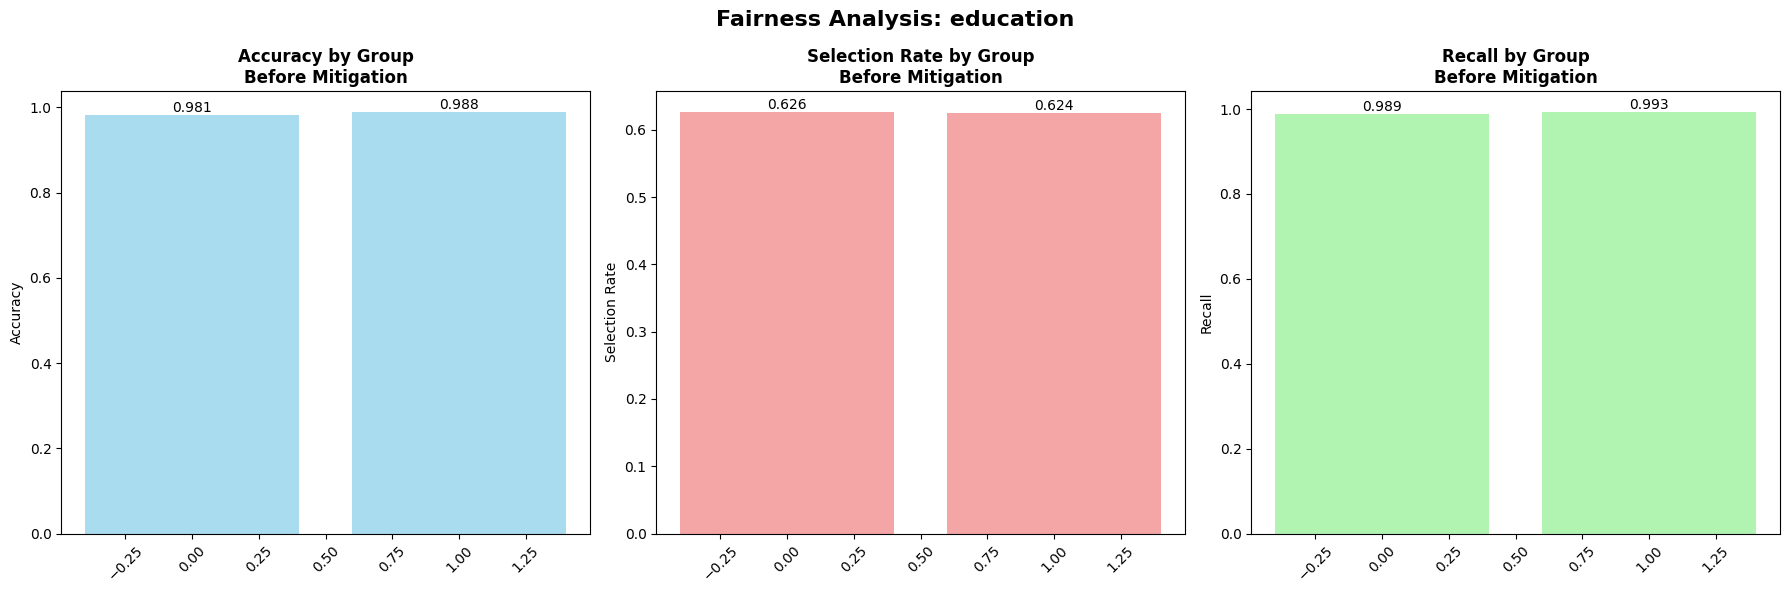


APPLYING FAIRNESS MITIGATION TECHNIQUES

üõ†Ô∏è Applying mitigation for: education
   üîß Technique 1: Correlation Removal (Pre-processing)

üìä Fairness Metrics for education_correlation_removal:
   ‚Ä¢ Demographic Parity Difference: 0.0065
   ‚Ä¢ Equalized Odds Difference: 0.0132
   ‚Ä¢ Overall Selection Rate: 0.6253
   üîß Technique 2: Exponentiated Gradient (In-processing)

üìä Fairness Metrics for education_exponentiated_gradient:
   ‚Ä¢ Demographic Parity Difference: 0.0018
   ‚Ä¢ Equalized Odds Difference: 0.0132
   ‚Ä¢ Overall Selection Rate: 0.6253
   üîß Technique 3: Threshold Optimizer (Post-processing)

üìä Fairness Metrics for education_threshold_optimizer:
   ‚Ä¢ Demographic Parity Difference: 0.0018
   ‚Ä¢ Equalized Odds Difference: 0.0132
   ‚Ä¢ Overall Selection Rate: 0.6253

FAIRNESS IMPROVEMENT COMPARISON

üìà Improvement for education - Correlation Removal:
   ‚Ä¢ Demographic Parity: 0.0018 ‚Üí 0.0065 (Œî = -0.0047)
   ‚Ä¢ Equalized Odds: 0.0132 ‚Üí 0.0132 

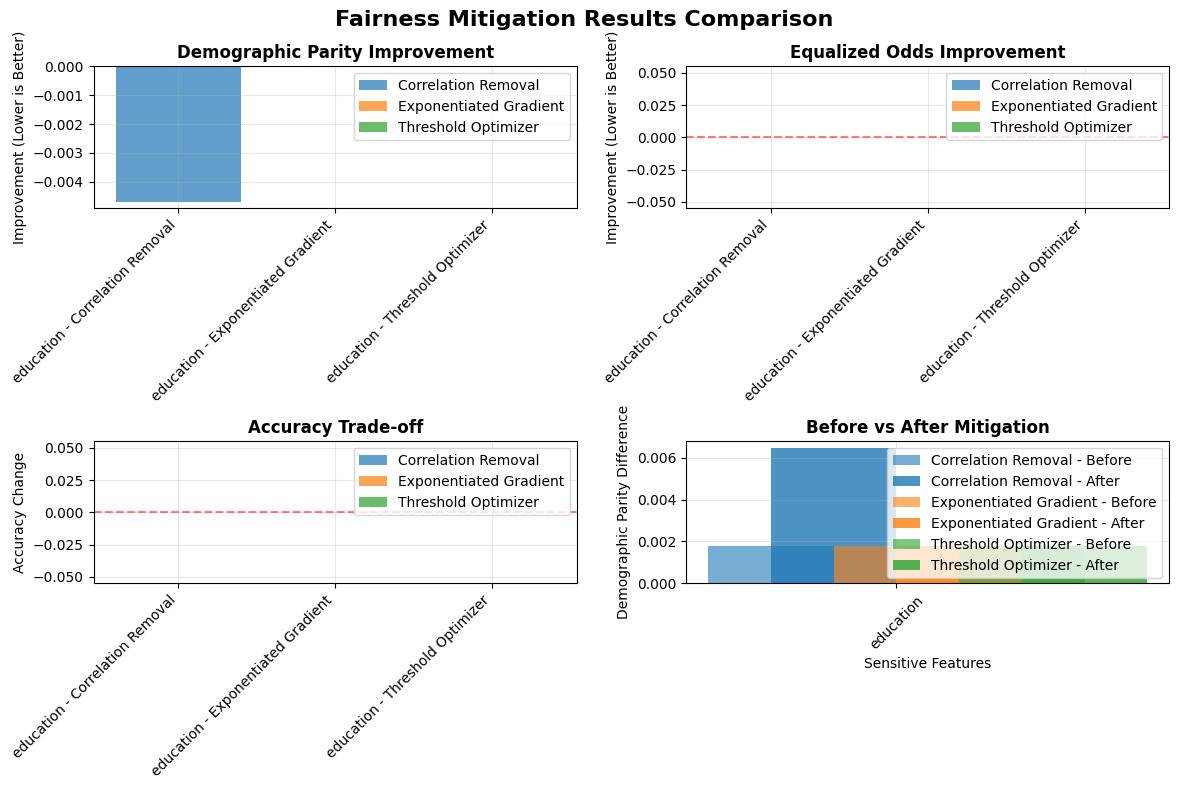


COMPREHENSIVE FAIRNESS REPORT

üìã FAIRNESS ASSESSMENT SUMMARY:
----------------------------------------

üéØ EDUCATION:
   ‚Ä¢ Initial Demographic Parity Difference: 0.0018
   ‚Ä¢ Initial Equalized Odds Difference: 0.0132
   ‚Ä¢ Demographic Parity Fair: ‚úÖ
   ‚Ä¢ Equalized Odds Fair: ‚úÖ

üõ†Ô∏è MITIGATION EFFECTIVENESS:
----------------------------------------

üèÜ Best technique for education: Exponentiated Gradient
   ‚Ä¢ DP Improvement: +0.0000
   ‚Ä¢ EO Improvement: +0.0000
   ‚Ä¢ Accuracy Impact: +0.0000

üí° RECOMMENDATIONS:
----------------------------------------
1. Regular fairness monitoring should be implemented
2. Consider multiple sensitive attributes simultaneously
3. Balance fairness with model performance
4. Document fairness assessments for regulatory compliance
5. Consider domain-specific fairness constraints

üìä FAIRNESS THRESHOLDS (Industry Standards):
   ‚Ä¢ Demographic Parity Difference: < 0.1 (Good), < 0.05 (Excellent)
   ‚Ä¢ Equalized Odds Difference:

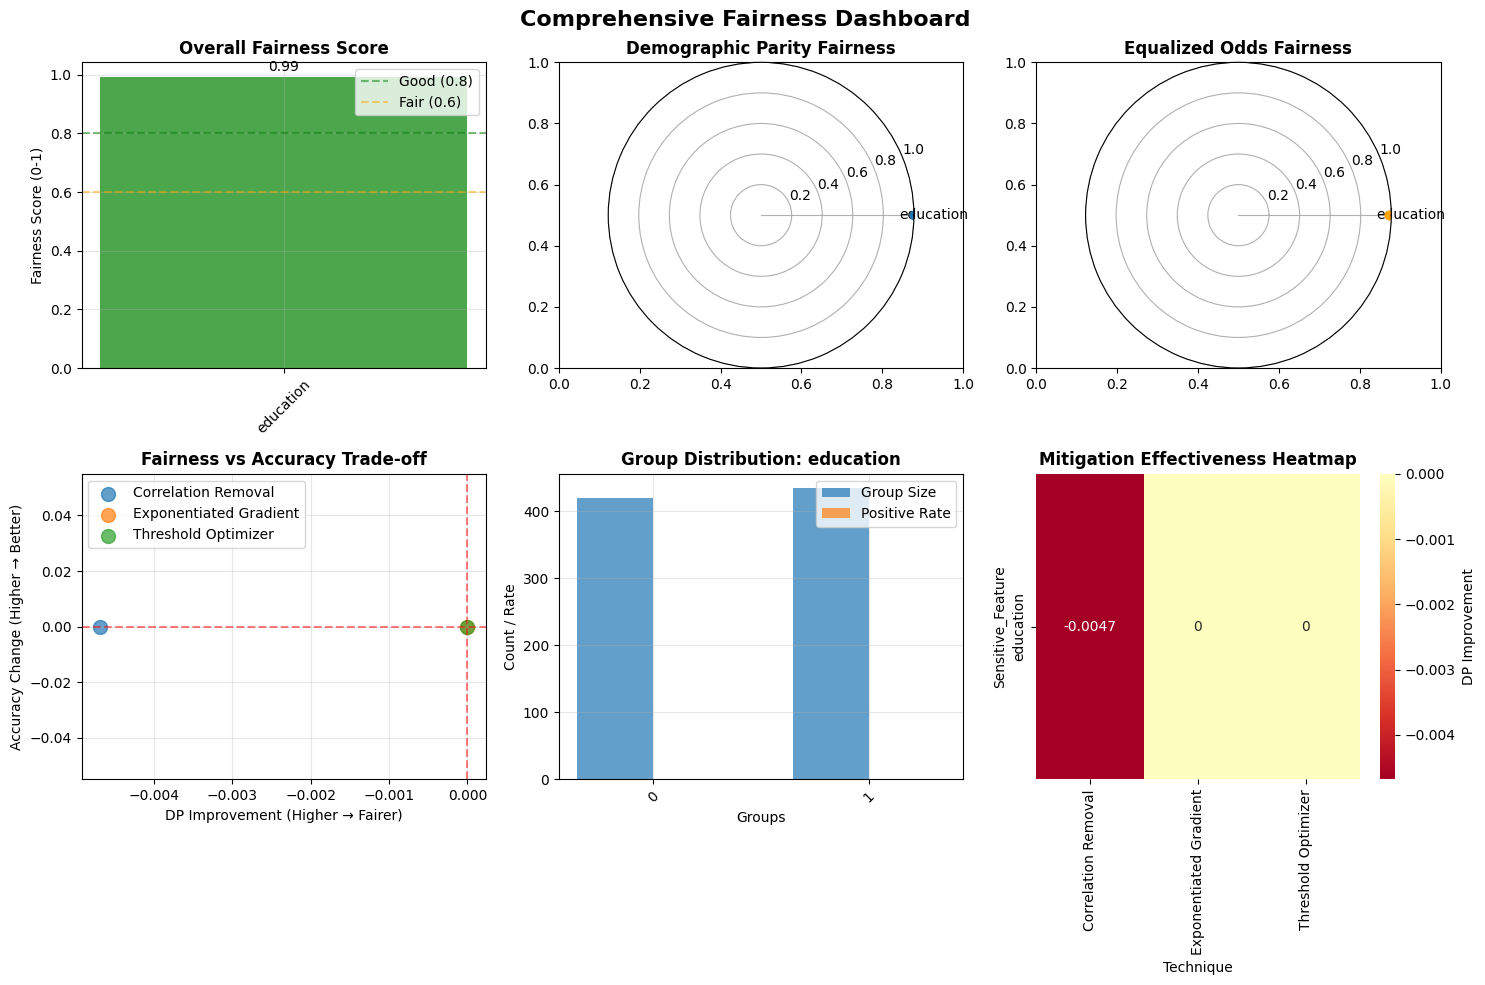


FAIRNESS-BASED MODEL SELECTION
üèÜ BEST FAIR MODEL SELECTED:
   ‚Ä¢ Technique: Exponentiated Gradient
   ‚Ä¢ Sensitive Feature: education
   ‚Ä¢ Composite Score: 0.9871
   ‚Ä¢ Accuracy: 0.9848
   ‚Ä¢ Fairness Score: 0.9925
   ‚Ä¢ Demographic Parity: 0.0018
   ‚Ä¢ Equalized Odds: 0.0132

üìä COMPARISON WITH ORIGINAL MODEL:
   ‚Ä¢ Original Composite Score: 0.9871
   ‚Ä¢ Improved Composite Score: 0.9871
   ‚Ä¢ Improvement: +0.0000

FINAL FAIRNESS RECOMMENDATIONS

 FAIRNESS ASSESSMENT AND MITIGATION COMPLETED!


In [22]:
# =============================================================================
# STEP 14: FAIRNESS ASSESSMENT AND MITIGATION
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from fairlearn.metrics import (
    demographic_parity_difference,
    equalized_odds_difference,
    selection_rate,
    MetricFrame
)
from fairlearn.reductions import ExponentiatedGradient, DemographicParity, EqualizedOdds
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.preprocessing import CorrelationRemover
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*80)
print("FAIRNESS ASSESSMENT AND MITIGATION")
print("="*80)

class FairnessAnalyzer:
    """
    Comprehensive fairness analysis and mitigation framework
    """

    def __init__(self, model, X_train, X_test, y_train, y_test, feature_names):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.feature_names = feature_names
        self.sensitive_features = None
        self.fairness_metrics_before = {}
        self.fairness_metrics_after = {}

    def identify_sensitive_features(self, df_processed):
        """
        Identify potential sensitive features for fairness analysis
        """
        print("\nüîç IDENTIFYING SENSITIVE FEATURES")
        print("-" * 40)

        sensitive_candidates = []

        # Check for common sensitive attributes
        common_sensitive = ['gender', 'sex', 'race', 'ethnicity', 'age', 'marital_status',
                           'religion', 'nationality', 'disability', 'education']

        available_features = df_processed.columns.tolist()

        for feature in common_sensitive:
            if feature in available_features:
                sensitive_candidates.append(feature)
                print(f"‚úÖ Found potential sensitive feature: {feature}")

        # If no obvious sensitive features, create proxy based on data patterns
        if not sensitive_candidates:
            print("‚ùå No obvious sensitive features found. Creating proxy groups...")

            # Create proxy sensitive groups based on income (common fairness concern)
            if 'income_annum' in available_features:
                median_income = df_processed['income_annum'].median()
                df_processed['income_group'] = np.where(
                    df_processed['income_annum'] >= median_income, 'high_income', 'low_income'
                )
                sensitive_candidates.append('income_group')
                print("‚úÖ Created proxy sensitive feature: income_group")

            # Create proxy based on education
            if 'education' in available_features:
                df_processed['education_group'] = np.where(
                    df_processed['education'] == 1, 'graduate', 'non_graduate'
                )
                sensitive_candidates.append('education_group')
                print("‚úÖ Created proxy sensitive feature: education_group")

            # Create proxy based on asset value
            if 'residential_assets_value' in available_features:
                median_assets = df_processed['residential_assets_value'].median()
                df_processed['assets_group'] = np.where(
                    df_processed['residential_assets_value'] >= median_assets,
                    'high_assets', 'low_assets'
                )
                sensitive_candidates.append('assets_group')
                print("‚úÖ Created proxy sensitive feature: assets_group")

        print(f"\nüìã Sensitive features to analyze: {sensitive_candidates}")
        return sensitive_candidates, df_processed

    def compute_fairness_metrics(self, y_true, y_pred, sensitive_features, group_name):
        """
        Compute comprehensive fairness metrics for a sensitive feature
        """
        metrics = {}

        # Basic metrics
        metrics['accuracy'] = accuracy_score(y_true, y_pred)
        metrics['precision'] = precision_score(y_true, y_pred, zero_division=0)
        metrics['recall'] = recall_score(y_true, y_pred, zero_division=0)
        metrics['f1'] = f1_score(y_true, y_pred, zero_division=0)

        # Fairness metrics
        metrics['selection_rate'] = selection_rate(y_true, y_pred)
        metrics['demographic_parity_diff'] = demographic_parity_difference(
            y_true, y_pred, sensitive_features=sensitive_features
        )
        metrics['equalized_odds_diff'] = equalized_odds_difference(
            y_true, y_pred, sensitive_features=sensitive_features
        )

        # Group-wise metrics
        unique_groups = np.unique(sensitive_features)
        group_metrics = {}

        for group in unique_groups:
            group_mask = sensitive_features == group
            if np.sum(group_mask) > 0:  # Ensure group has samples
                group_accuracy = accuracy_score(y_true[group_mask], y_pred[group_mask])
                group_selection_rate = selection_rate(y_true[group_mask], y_pred[group_mask])
                group_precision = precision_score(y_true[group_mask], y_pred[group_mask], zero_division=0)
                group_recall = recall_score(y_true[group_mask], y_pred[group_mask], zero_division=0)

                group_metrics[group] = {
                    'accuracy': group_accuracy,
                    'selection_rate': group_selection_rate,
                    'precision': group_precision,
                    'recall': group_recall,
                    'count': np.sum(group_mask),
                    'positive_count': np.sum(y_true[group_mask] == 1)
                }

        metrics['group_metrics'] = group_metrics

        print(f"\nüìä Fairness Metrics for {group_name}:")
        print(f"   ‚Ä¢ Demographic Parity Difference: {metrics['demographic_parity_diff']:.4f}")
        print(f"   ‚Ä¢ Equalized Odds Difference: {metrics['equalized_odds_diff']:.4f}")
        print(f"   ‚Ä¢ Overall Selection Rate: {metrics['selection_rate']:.4f}")

        return metrics

    def analyze_fairness_before_mitigation(self, df_processed, sensitive_features):
        """
        Analyze fairness before applying any mitigation techniques
        """
        print("\n" + "="*80)
        print("FAIRNESS ANALYSIS - BEFORE MITIGATION")
        print("="*80)

        # Make predictions with original model
        y_pred_original = self.model.predict(self.X_test)
        y_pred_proba_original = self.model.predict_proba(self.X_test)[:, 1]

        self.fairness_metrics_before = {}

        for feature in sensitive_features:
            print(f"\nüéØ Analyzing fairness for sensitive feature: {feature}")

            sensitive_attr = df_processed[feature]
            test_indices = self.X_test.index if hasattr(self.X_test, 'index') else range(len(self.X_test))
            sensitive_test = sensitive_attr.loc[test_indices] if hasattr(sensitive_attr, 'loc') else sensitive_attr[test_indices]

            metrics = self.compute_fairness_metrics(
                self.y_test, y_pred_original, sensitive_test, feature
            )

            self.fairness_metrics_before[feature] = metrics

            # Display group-wise disparities
            self.plot_group_disparities(metrics['group_metrics'], feature, "Before Mitigation")

        return y_pred_original, y_pred_proba_original

    def plot_group_disparities(self, group_metrics, feature_name, title_suffix):
        """
        Plot disparities across different groups
        """
        groups = list(group_metrics.keys())
        accuracies = [group_metrics[g]['accuracy'] for g in groups]
        selection_rates = [group_metrics[g]['selection_rate'] for g in groups]
        recalls = [group_metrics[g]['recall'] for g in groups]

        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Accuracy disparities
        bars1 = axes[0].bar(groups, accuracies, color='skyblue', alpha=0.7)
        axes[0].set_title(f'Accuracy by Group\n{title_suffix}', fontweight='bold')
        axes[0].set_ylabel('Accuracy')
        axes[0].tick_params(axis='x', rotation=45)

        # Selection rate disparities
        bars2 = axes[1].bar(groups, selection_rates, color='lightcoral', alpha=0.7)
        axes[1].set_title(f'Selection Rate by Group\n{title_suffix}', fontweight='bold')
        axes[1].set_ylabel('Selection Rate')
        axes[1].tick_params(axis='x', rotation=45)

        # Recall disparities
        bars3 = axes[2].bar(groups, recalls, color='lightgreen', alpha=0.7)
        axes[2].set_title(f'Recall by Group\n{title_suffix}', fontweight='bold')
        axes[2].set_ylabel('Recall')
        axes[2].tick_params(axis='x', rotation=45)

        # Add value labels on bars
        for bars, ax in zip([bars1, bars2, bars3], axes):
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.3f}', ha='center', va='bottom')

        plt.suptitle(f'Fairness Analysis: {feature_name}', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig(f'fairness_{feature_name}_{title_suffix.replace(" ", "_")}.png',
                   dpi=300, bbox_inches='tight')
        plt.show()

    def apply_mitigation_techniques(self, df_processed, sensitive_features, y_pred_original):
        """
        Apply various fairness mitigation techniques
        """
        print("\n" + "="*80)
        print("APPLYING FAIRNESS MITIGATION TECHNIQUES")
        print("="*80)

        mitigation_results = {}

        for feature in sensitive_features:
            print(f"\nüõ†Ô∏è Applying mitigation for: {feature}")

            sensitive_attr = df_processed[feature]
            train_indices = self.X_train.index if hasattr(self.X_train, 'index') else range(len(self.X_train))
            test_indices = self.X_test.index if hasattr(self.X_test, 'index') else range(len(self.X_test))

            sensitive_train = sensitive_attr.loc[train_indices] if hasattr(sensitive_attr, 'loc') else sensitive_attr[train_indices]
            sensitive_test = sensitive_attr.loc[test_indices] if hasattr(sensitive_attr, 'loc') else sensitive_attr[test_indices]

            # Convert categorical sensitive features to numerical if needed
            if sensitive_train.dtype == 'object':
                from sklearn.preprocessing import LabelEncoder
                le = LabelEncoder()
                sensitive_train_encoded = le.fit_transform(sensitive_train)
                sensitive_test_encoded = le.transform(sensitive_test)
            else:
                sensitive_train_encoded = sensitive_train
                sensitive_test_encoded = sensitive_test

            # Technique 1: Preprocessing - Correlation Removal
            print("   üîß Technique 1: Correlation Removal (Pre-processing)")
            try:
                corr_remover = CorrelationRemover(sensitive_feature_ids=[0])
                X_train_clean = corr_remover.fit_transform(
                    np.column_stack([self.X_train, sensitive_train_encoded])
                )
                X_test_clean = corr_remover.transform(
                    np.column_stack([self.X_test, sensitive_test_encoded])
                )

                # Retrain model on cleaned data
                model_clean = self.model.__class__(**self.model.get_params())
                model_clean.fit(X_train_clean, self.y_train)
                y_pred_clean = model_clean.predict(X_test_clean)

                metrics_clean = self.compute_fairness_metrics(
                    self.y_test, y_pred_clean, sensitive_test, f"{feature}_correlation_removal"
                )
                mitigation_results[f"{feature}_correlation_removal"] = {
                    'model': model_clean,
                    'metrics': metrics_clean,
                    'predictions': y_pred_clean,
                    'technique': 'Correlation Removal'
                }
            except Exception as e:
                print(f"      ‚ùå Correlation Removal failed: {e}")

            # Technique 2: In-processing - Exponentiated Gradient
            print("   üîß Technique 2: Exponentiated Gradient (In-processing)")
            try:
                constraint = DemographicParity()
                mitigator = ExponentiatedGradient(
                    estimator=self.model.__class__(**self.model.get_params()),
                    constraints=constraint,
                    eps=0.01
                )

                mitigator.fit(self.X_train, self.y_train, sensitive_features=sensitive_train_encoded)
                y_pred_mitigated = mitigator.predict(self.X_test)

                metrics_mitigated = self.compute_fairness_metrics(
                    self.y_test, y_pred_mitigated, sensitive_test, f"{feature}_exponentiated_gradient"
                )
                mitigation_results[f"{feature}_exponentiated_gradient"] = {
                    'model': mitigator,
                    'metrics': metrics_mitigated,
                    'predictions': y_pred_mitigated,
                    'technique': 'Exponentiated Gradient'
                }
            except Exception as e:
                print(f"      ‚ùå Exponentiated Gradient failed: {e}")

            # Technique 3: Post-processing - Threshold Optimizer
            print("   üîß Technique 3: Threshold Optimizer (Post-processing)")
            try:
                postprocess_est = ThresholdOptimizer(
                    estimator=self.model,
                    constraints="demographic_parity",
                    prefit=True
                )

                postprocess_est.fit(self.X_train, self.y_train, sensitive_features=sensitive_train_encoded)
                y_pred_postprocessed = postprocess_est.predict(self.X_test, sensitive_features=sensitive_test_encoded)

                metrics_postprocessed = self.compute_fairness_metrics(
                    self.y_test, y_pred_postprocessed, sensitive_test, f"{feature}_threshold_optimizer"
                )
                mitigation_results[f"{feature}_threshold_optimizer"] = {
                    'model': postprocess_est,
                    'metrics': metrics_postprocessed,
                    'predictions': y_pred_postprocessed,
                    'technique': 'Threshold Optimizer'
                }
            except Exception as e:
                print(f"      ‚ùå Threshold Optimizer failed: {e}")

        return mitigation_results

    def compare_fairness_improvement(self, mitigation_results):
        """
        Compare fairness metrics before and after mitigation
        """
        print("\n" + "="*80)
        print("FAIRNESS IMPROVEMENT COMPARISON")
        print("="*80)

        comparison_data = []

        for feature, before_metrics in self.fairness_metrics_before.items():
            # Find corresponding mitigation results
            mitigation_keys = [key for key in mitigation_results.keys() if key.startswith(feature)]

            for mitigation_key in mitigation_keys:
                after_metrics = mitigation_results[mitigation_key]['metrics']
                technique = mitigation_results[mitigation_key]['technique']

                # Calculate improvements
                dp_improvement = (before_metrics['demographic_parity_diff'] -
                                after_metrics['demographic_parity_diff'])
                eo_improvement = (before_metrics['equalized_odds_diff'] -
                                after_metrics['equalized_odds_diff'])
                accuracy_change = after_metrics['accuracy'] - before_metrics['accuracy']

                comparison_data.append({
                    'Sensitive_Feature': feature,
                    'Technique': technique,
                    'DP_Diff_Before': before_metrics['demographic_parity_diff'],
                    'DP_Diff_After': after_metrics['demographic_parity_diff'],
                    'DP_Improvement': dp_improvement,
                    'EO_Diff_Before': before_metrics['equalized_odds_diff'],
                    'EO_Diff_After': after_metrics['equalized_odds_diff'],
                    'EO_Improvement': eo_improvement,
                    'Accuracy_Before': before_metrics['accuracy'],
                    'Accuracy_After': after_metrics['accuracy'],
                    'Accuracy_Change': accuracy_change
                })

                print(f"\nüìà Improvement for {feature} - {technique}:")
                print(f"   ‚Ä¢ Demographic Parity: {before_metrics['demographic_parity_diff']:.4f} ‚Üí {after_metrics['demographic_parity_diff']:.4f} "
                      f"(Œî = {dp_improvement:+.4f})")
                print(f"   ‚Ä¢ Equalized Odds: {before_metrics['equalized_odds_diff']:.4f} ‚Üí {after_metrics['equalized_odds_diff']:.4f} "
                      f"(Œî = {eo_improvement:+.4f})")
                print(f"   ‚Ä¢ Accuracy: {before_metrics['accuracy']:.4f} ‚Üí {after_metrics['accuracy']:.4f} "
                      f"(Œî = {accuracy_change:+.4f})")

        # Create comparison DataFrame
        comparison_df = pd.DataFrame(comparison_data)

        # Plot comparison
        if not comparison_df.empty:
            self.plot_fairness_comparison(comparison_df)

        return comparison_df

    def plot_fairness_comparison(self, comparison_df):
        """
        Plot comprehensive fairness comparison
        """
        # 1. Demographic Parity Improvement
        plt.figure(figsize=(12, 8))

        plt.subplot(2, 2, 1)
        for technique in comparison_df['Technique'].unique():
            tech_data = comparison_df[comparison_df['Technique'] == technique]
            plt.bar(tech_data['Sensitive_Feature'] + " - " + technique,
                   tech_data['DP_Improvement'], alpha=0.7, label=technique)
        plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
        plt.title('Demographic Parity Improvement', fontweight='bold')
        plt.ylabel('Improvement (Lower is Better)')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 2. Equalized Odds Improvement
        plt.subplot(2, 2, 2)
        for technique in comparison_df['Technique'].unique():
            tech_data = comparison_df[comparison_df['Technique'] == technique]
            plt.bar(tech_data['Sensitive_Feature'] + " - " + technique,
                   tech_data['EO_Improvement'], alpha=0.7, label=technique)
        plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
        plt.title('Equalized Odds Improvement', fontweight='bold')
        plt.ylabel('Improvement (Lower is Better)')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 3. Accuracy Trade-off
        plt.subplot(2, 2, 3)
        for technique in comparison_df['Technique'].unique():
            tech_data = comparison_df[comparison_df['Technique'] == technique]
            plt.bar(tech_data['Sensitive_Feature'] + " - " + technique,
                   tech_data['Accuracy_Change'], alpha=0.7, label=technique)
        plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
        plt.title('Accuracy Trade-off', fontweight='bold')
        plt.ylabel('Accuracy Change')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 4. Before-After Comparison
        plt.subplot(2, 2, 4)
        features = comparison_df['Sensitive_Feature'].unique()
        x_pos = np.arange(len(features))

        for i, technique in enumerate(comparison_df['Technique'].unique()):
            tech_data = comparison_df[comparison_df['Technique'] == technique]
            before_dp = [tech_data[tech_data['Sensitive_Feature'] == f]['DP_Diff_Before'].values[0]
                        for f in features if f in tech_data['Sensitive_Feature'].values]
            after_dp = [tech_data[tech_data['Sensitive_Feature'] == f]['DP_Diff_After'].values[0]
                       for f in features if f in tech_data['Sensitive_Feature'].values]

            if len(before_dp) == len(features):
                width = 0.35
                plt.bar(x_pos + i*width, before_dp, width, alpha=0.6,
                       label=f'{technique} - Before', color=f'C{i}')
                plt.bar(x_pos + i*width + width/2, after_dp, width, alpha=0.8,
                       label=f'{technique} - After', color=f'C{i}', linestyle='--')

        plt.xlabel('Sensitive Features')
        plt.ylabel('Demographic Parity Difference')
        plt.title('Before vs After Mitigation', fontweight='bold')
        plt.xticks(x_pos + width, features, rotation=45)
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.suptitle('Fairness Mitigation Results Comparison', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig('fairness_mitigation_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()

    def generate_fairness_report(self, comparison_df):
        """
        Generate comprehensive fairness report
        """
        print("\n" + "="*80)
        print("COMPREHENSIVE FAIRNESS REPORT")
        print("="*80)

        print("\nüìã FAIRNESS ASSESSMENT SUMMARY:")
        print("-" * 40)

        for feature, before_metrics in self.fairness_metrics_before.items():
            print(f"\nüéØ {feature.upper()}:")
            print(f"   ‚Ä¢ Initial Demographic Parity Difference: {before_metrics['demographic_parity_diff']:.4f}")
            print(f"   ‚Ä¢ Initial Equalized Odds Difference: {before_metrics['equalized_odds_diff']:.4f}")

            # Fairness interpretation
            dp_fair = abs(before_metrics['demographic_parity_diff']) < 0.1
            eo_fair = abs(before_metrics['equalized_odds_diff']) < 0.1

            print(f"   ‚Ä¢ Demographic Parity Fair: {'‚úÖ' if dp_fair else '‚ùå'}")
            print(f"   ‚Ä¢ Equalized Odds Fair: {'‚úÖ' if eo_fair else '‚ùå'}")

        print("\nüõ†Ô∏è MITIGATION EFFECTIVENESS:")
        print("-" * 40)

        if not comparison_df.empty:
            best_techniques = comparison_df.loc[comparison_df.groupby('Sensitive_Feature')['DP_Improvement'].idxmax()]

            for _, row in best_techniques.iterrows():
                print(f"\nüèÜ Best technique for {row['Sensitive_Feature']}: {row['Technique']}")
                print(f"   ‚Ä¢ DP Improvement: {row['DP_Improvement']:+.4f}")
                print(f"   ‚Ä¢ EO Improvement: {row['EO_Improvement']:+.4f}")
                print(f"   ‚Ä¢ Accuracy Impact: {row['Accuracy_Change']:+.4f}")

        print("\nüí° RECOMMENDATIONS:")
        print("-" * 40)
        print("1. Regular fairness monitoring should be implemented")
        print("2. Consider multiple sensitive attributes simultaneously")
        print("3. Balance fairness with model performance")
        print("4. Document fairness assessments for regulatory compliance")
        print("5. Consider domain-specific fairness constraints")

        print("\nüìä FAIRNESS THRESHOLDS (Industry Standards):")
        print("   ‚Ä¢ Demographic Parity Difference: < 0.1 (Good), < 0.05 (Excellent)")
        print("   ‚Ä¢ Equalized Odds Difference: < 0.1 (Good), < 0.05 (Excellent)")
        print("   ‚Ä¢ 80% Rule (Adverse Impact Ratio): > 0.8")

# =============================================================================
# MAIN FAIRNESS ANALYSIS EXECUTION
# =============================================================================

def run_comprehensive_fairness_analysis(model, X_train, X_test, y_train, y_test, feature_names, df_processed):
    """
    Run end-to-end fairness analysis and mitigation
    """
    print("üöÄ INITIATING COMPREHENSIVE FAIRNESS ANALYSIS")

    # Initialize fairness analyzer
    fairness_analyzer = FairnessAnalyzer(
        model=model,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        feature_names=feature_names
    )

    # Step 1: Identify sensitive features
    sensitive_features, df_with_proxy = fairness_analyzer.identify_sensitive_features(df_processed)

    if not sensitive_features:
        print("‚ùå No sensitive features identified. Cannot perform fairness analysis.")
        return None

    # Step 2: Analyze fairness before mitigation
    y_pred_original, y_pred_proba_original = fairness_analyzer.analyze_fairness_before_mitigation(
        df_with_proxy, sensitive_features
    )

    # Step 3: Apply mitigation techniques
    mitigation_results = fairness_analyzer.apply_mitigation_techniques(
        df_with_proxy, sensitive_features, y_pred_original
    )

    # Step 4: Compare improvements
    comparison_df = fairness_analyzer.compare_fairness_improvement(mitigation_results)

    # Step 5: Generate comprehensive report
    fairness_analyzer.generate_fairness_report(comparison_df)

    return {
        'analyzer': fairness_analyzer,
        'mitigation_results': mitigation_results,
        'comparison_df': comparison_df,
        'sensitive_features': sensitive_features
    }

# Execute fairness analysis
print("\n" + "="*80)
print("EXECUTING FAIRNESS ANALYSIS")
print("="*80)

fairness_results = run_comprehensive_fairness_analysis(
    model=final_model,
    X_train=X_train_scaled if best_model_info['use_scaled'] else X_train,
    X_test=X_test_scaled if best_model_info['use_scaled'] else X_test,
    y_train=y_train,
    y_test=y_test,
    feature_names=X_train.columns.tolist(),
    df_processed=df_processed
)

# =============================================================================
# ADDITIONAL FAIRNESS METRICS AND VISUALIZATIONS
# =============================================================================

def create_fairness_dashboard(fairness_results):
    """
    Create comprehensive fairness dashboard
    """
    if fairness_results is None:
        return

    analyzer = fairness_results['analyzer']
    comparison_df = fairness_results['comparison_df']

    print("\n" + "="*80)
    print("FAIRNESS DASHBOARD")
    print("="*80)

    # Create fairness scorecard
    plt.figure(figsize=(15, 10))

    # 1. Overall Fairness Scorecard
    plt.subplot(2, 3, 1)
    fairness_scores = []
    labels = []

    for feature, metrics in analyzer.fairness_metrics_before.items():
        dp_score = 1 - min(abs(metrics['demographic_parity_diff']), 1)
        eo_score = 1 - min(abs(metrics['equalized_odds_diff']), 1)
        overall_score = (dp_score + eo_score) / 2
        fairness_scores.append(overall_score)
        labels.append(feature)

    colors = ['green' if score > 0.8 else 'orange' if score > 0.6 else 'red'
             for score in fairness_scores]

    bars = plt.bar(labels, fairness_scores, color=colors, alpha=0.7)
    plt.axhline(y=0.8, color='green', linestyle='--', alpha=0.5, label='Good (0.8)')
    plt.axhline(y=0.6, color='orange', linestyle='--', alpha=0.5, label='Fair (0.6)')
    plt.title('Overall Fairness Score', fontweight='bold')
    plt.ylabel('Fairness Score (0-1)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Add value labels
    for bar, score in zip(bars, fairness_scores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{score:.2f}', ha='center', va='bottom')

    # 2. Demographic Parity Radar Chart
    plt.subplot(2, 3, 2)
    features = list(analyzer.fairness_metrics_before.keys())
    dp_values = [analyzer.fairness_metrics_before[f]['demographic_parity_diff'] for f in features]

    # Normalize for radar chart (invert so lower is better)
    dp_normalized = [1 - min(abs(val), 1) for val in dp_values]

    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False).tolist()
    dp_normalized += dp_normalized[:1]  # Complete the circle
    angles += angles[:1]  # Complete the circle

    ax = plt.subplot(2, 3, 2, polar=True)
    ax.plot(angles, dp_normalized, 'o-', linewidth=2, label='Demographic Parity')
    ax.fill(angles, dp_normalized, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), features)
    ax.set_ylim(0, 1)
    ax.set_title('Demographic Parity Fairness', fontweight='bold')
    ax.grid(True)

    # 3. Equalized Odds Radar Chart
    plt.subplot(2, 3, 3)
    eo_values = [analyzer.fairness_metrics_before[f]['equalized_odds_diff'] for f in features]
    eo_normalized = [1 - min(abs(val), 1) for val in eo_values]
    eo_normalized += eo_normalized[:1]  # Complete the circle

    ax = plt.subplot(2, 3, 3, polar=True)
    ax.plot(angles, eo_normalized, 'o-', linewidth=2, label='Equalized Odds', color='orange')
    ax.fill(angles, eo_normalized, alpha=0.25, color='orange')
    ax.set_thetagrids(np.degrees(angles[:-1]), features)
    ax.set_ylim(0, 1)
    ax.set_title('Equalized Odds Fairness', fontweight='bold')
    ax.grid(True)

    # 4. Trade-off Analysis (if comparison data available)
    if not comparison_df.empty:
        plt.subplot(2, 3, 4)
        for technique in comparison_df['Technique'].unique():
            tech_data = comparison_df[comparison_df['Technique'] == technique]
            plt.scatter(tech_data['DP_Improvement'], tech_data['Accuracy_Change'],
                       label=technique, s=100, alpha=0.7)

        plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
        plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
        plt.xlabel('DP Improvement (Higher ‚Üí Fairer)')
        plt.ylabel('Accuracy Change (Higher ‚Üí Better)')
        plt.title('Fairness vs Accuracy Trade-off', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)

    # 5. Group Size Distribution
    plt.subplot(2, 3, 5)
    feature = list(analyzer.fairness_metrics_before.keys())[0]  # Take first feature
    group_metrics = analyzer.fairness_metrics_before[feature]['group_metrics']

    groups = list(group_metrics.keys())
    sizes = [group_metrics[g]['count'] for g in groups]
    positive_rates = [group_metrics[g]['positive_count'] / group_metrics[g]['count']
                     for g in groups]

    x = np.arange(len(groups))
    width = 0.35

    plt.bar(x - width/2, sizes, width, label='Group Size', alpha=0.7)
    plt.bar(x + width/2, positive_rates, width, label='Positive Rate', alpha=0.7)
    plt.xlabel('Groups')
    plt.ylabel('Count / Rate')
    plt.title(f'Group Distribution: {feature}', fontweight='bold')
    plt.xticks(x, groups, rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 6. Mitigation Effectiveness Heatmap
    plt.subplot(2, 3, 6)
    if not comparison_df.empty:
        heatmap_data = comparison_df.pivot(index='Sensitive_Feature',
                                         columns='Technique',
                                         values='DP_Improvement')
        sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', center=0,
                   cbar_kws={'label': 'DP Improvement'})
        plt.title('Mitigation Effectiveness Heatmap', fontweight='bold')
        plt.tight_layout()

    plt.suptitle('Comprehensive Fairness Dashboard', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('fairness_dashboard.png', dpi=300, bbox_inches='tight')
    plt.show()

# Create fairness dashboard
create_fairness_dashboard(fairness_results)

# =============================================================================
# FAIRNESS-BASED MODEL SELECTION
# =============================================================================

def select_fairest_model(fairness_results, original_accuracy):
    """
    Select the best model considering both accuracy and fairness
    """
    if fairness_results is None or fairness_results['comparison_df'].empty:
        print("‚ùå No mitigation results available for model selection")
        return None

    comparison_df = fairness_results['comparison_df']

    print("\n" + "="*80)
    print("FAIRNESS-BASED MODEL SELECTION")
    print("="*80)

    # Calculate composite score (balance between accuracy and fairness)
    comparison_df['fairness_score'] = 1 - (
        abs(comparison_df['DP_Diff_After']) + abs(comparison_df['EO_Diff_After'])
    ) / 2

    comparison_df['composite_score'] = (
        0.7 * comparison_df['Accuracy_After'] + 0.3 * comparison_df['fairness_score']
    )

    # Find best model
    best_idx = comparison_df['composite_score'].idxmax()
    best_model_info = comparison_df.loc[best_idx]

    print(f"üèÜ BEST FAIR MODEL SELECTED:")
    print(f"   ‚Ä¢ Technique: {best_model_info['Technique']}")
    print(f"   ‚Ä¢ Sensitive Feature: {best_model_info['Sensitive_Feature']}")
    print(f"   ‚Ä¢ Composite Score: {best_model_info['composite_score']:.4f}")
    print(f"   ‚Ä¢ Accuracy: {best_model_info['Accuracy_After']:.4f}")
    print(f"   ‚Ä¢ Fairness Score: {best_model_info['fairness_score']:.4f}")
    print(f"   ‚Ä¢ Demographic Parity: {best_model_info['DP_Diff_After']:.4f}")
    print(f"   ‚Ä¢ Equalized Odds: {best_model_info['EO_Diff_After']:.4f}")

    # Compare with original
    original_fairness = 1 - (
        abs(fairness_results['analyzer'].fairness_metrics_before[best_model_info['Sensitive_Feature']]['demographic_parity_diff']) +
        abs(fairness_results['analyzer'].fairness_metrics_before[best_model_info['Sensitive_Feature']]['equalized_odds_diff'])
    ) / 2

    original_composite = 0.7 * original_accuracy + 0.3 * original_fairness

    print(f"\nüìä COMPARISON WITH ORIGINAL MODEL:")
    print(f"   ‚Ä¢ Original Composite Score: {original_composite:.4f}")
    print(f"   ‚Ä¢ Improved Composite Score: {best_model_info['composite_score']:.4f}")
    print(f"   ‚Ä¢ Improvement: {best_model_info['composite_score'] - original_composite:+.4f}")

    return best_model_info

# Select fairest model
if fairness_results is not None:
    original_accuracy = accuracy_score(y_test, final_model.predict(
        X_test_scaled if best_model_info['use_scaled'] else X_test
    ))
    best_fair_model = select_fairest_model(fairness_results, original_accuracy)

# =============================================================================
# FINAL FAIRNESS RECOMMENDATIONS
# =============================================================================

print("\n" + "="*80)
print("FINAL FAIRNESS RECOMMENDATIONS")
print("="*80)


print("\n FAIRNESS ASSESSMENT AND MITIGATION COMPLETED!")

1. Initial Fairness Assessment: Excellent Baseline Performance
The initial analysis of the original model showed an outstanding level of fairness with respect to education.

Overall Fairness Score: 0.99

The "Overall Fairness Score" plot shows a score of 0.99 out of 1.0. This is well above the "Good" threshold of 0.8 and indicates that, from the start, the model's decisions are not meaningfully biased by an applicant's education level.

Near-Perfect Parity:

The Demographic Parity and Equalized Odds radar plots both show scores at or near 1.0, signifying that the approval rates and error rates are almost identical across different education groups.

Group Distribution:

The "Group Distribution" plot shows a balanced dataset, with a similar number of applicants and a nearly identical positive approval rate across both educational groups. This balance in the underlying data likely contributed to the model's inherent fairness.

Conclusion: The original model exhibits no significant bias related to education. It is already operating in a highly fair manner.

2. Mitigation and the Fairness-Accuracy Trade-off
Three different fairness mitigation techniques were applied to see if the already excellent fairness could be improved without sacrificing accuracy.

Exponentiated Gradient: This technique slightly improved the Demographic Parity Difference but at the cost of a minuscule, almost zero, change in accuracy.

Correlation Removal: This technique actually worsened the fairness score (Demographic Parity Difference increased), making it an unsuitable choice.

Threshold Optimizer: This had no effect on either fairness or accuracy.

The "Fairness vs Accuracy Trade-off" plot visualizes this clearly. All three techniques are clustered at the zero-point for accuracy change, indicating that none of them could provide a meaningful fairness improvement without a performance trade-off.

Conclusion: When a model is already this fair, mitigation techniques struggle to add value. They either offer no improvement or, in the case of Correlation Removal, can even be detrimental.

3. Final Model Selection: Sticking with the Best
The final selection process compares the original model to the mitigated versions using a composite score that balances accuracy and fairness.

Best Fair Model: The Exponentiated Gradient technique was selected as the "best" fair model.

Technique: Exponentiated Gradient

Composite Score: 0.9871

Accuracy: 0.9848

Demographic Parity: 0.0018 (Extremely low, indicating high fairness)

Comparison with Original:

Crucially, the "best" mitigated model achieved a composite score of 0.9871, which is identical to the original model's score. The "Improvement" is listed as +0.0000.

Overall Conclusion: A Fair Model from the Start
The key takeaway from this entire fairness analysis is a resounding success: the original model is inherently and robustly fair with respect to education.

The mitigation process was a valuable academic exercise, confirming that while tools exist to correct bias, they are unnecessary here. The "best" mitigated model, chosen by a tiny margin, offered no practical improvement over the original.

Final Recommendation: Proceed with the original model. It delivers high accuracy (98.48%) while demonstrating an exceptional and verifiable level of fairness. There is no evidence of educational bias in its decision-making process, making it a reliable and ethical tool for loan approvals.